In [ ]:

import os
print(os.listdir('/content/drive/MyDrive/NQS/Plot/'))

['NM_Variance_L100.csv', 'RNN_Variance_L100.csv', 'RBM_Variance_L100.csv', 'Plot_J1_J2_L32.csv', 'Plot_J1_J2_L100.csv', 'Plot_J1_J2_L34.csv', 'Plot_J1_J2_L66.csv', 'Plot_J1_J2_L102.csv', 'Plot_J1_J2_L64.csv', 'Plot_J1_J2_L64.gsheet', 'L_32_Symmetric.csv', 'L_64_Symmetric.csv', 'L_100_Symmetric.csv', 'L_32_Vanilla.csv', 'L_64_Vanilla.csv', 'L_100_Vanilla.csv', 'L20_Lieb.csv', 'L20_TFIM_Symmetric (1).gsheet', 'L20_TFIM_Symmetric.gsheet', 'L20_TFIM_Symmetric.csv', 'my_plot.png', 'L20_TFIM_Vanilla.csv', 'L_32_Vanilla.gsheet', 'L_64_Vanilla.gsheet']


In [ ]:
vanilla_L32   = "/content/drive/MyDrive/NQS/Plot/L_32_Vanilla.csv"
vanilla_L64   = "/content/drive/MyDrive/NQS/Plot/L_64_Vanilla.csv"
vanilla_L100  = "/content/drive/MyDrive/NQS/Plot/L_100_Vanilla.csv"


symmetric_L32   = "/content/drive/MyDrive/NQS/Plot/L_32_Symmetric.csv"
symmetric_L64   = "/content/drive/MyDrive/NQS/Plot/L_64_Symmetric.csv"
symmetric_L100  = "/content/drive/MyDrive/NQS/Plot/L_100_Symmetric.csv"


print(vanilla_L32)
print(vanilla_L64)
print(vanilla_L100)
print(symmetric_L32)
print(symmetric_L64)
print(symmetric_L100)


import pandas as pd

# Read CSV files

df_vanilla_L32  = pd.read_csv(vanilla_L32)
df_vanilla_L64  = pd.read_csv(vanilla_L64)
df_vanilla_L100 = pd.read_csv(vanilla_L100)

df_symmetric_L32  = pd.read_csv(symmetric_L32)
df_symmetric_L64  = pd.read_csv(symmetric_L64)
df_symmetric_L100 = pd.read_csv(symmetric_L100)

print(df_symmetric_L32.head())
print(df_symmetric_L64.head())
print(df_symmetric_L100.head())

print(df_vanilla_L32.head())
print(df_vanilla_L64.head())
print(df_vanilla_L100.head())

/content/drive/MyDrive/NQS/Plot/L_32_Vanilla.csv
/content/drive/MyDrive/NQS/Plot/L_64_Vanilla.csv
/content/drive/MyDrive/NQS/Plot/L_100_Vanilla.csv
/content/drive/MyDrive/NQS/Plot/L_32_Symmetric.csv
/content/drive/MyDrive/NQS/Plot/L_64_Symmetric.csv
/content/drive/MyDrive/NQS/Plot/L_100_Symmetric.csv
            Method      LR  No of params  Lattice Size   J2       DMRG  \
0              NaN  0.0010       51073.0            32  0.0 -14.206527   
1              NaN  0.0010       51073.0            32  0.1 -13.634229   
2              NaN  0.0010       51073.0            32  0.2 -13.092696   
3  Symmetric Model  0.0001       51073.0            32  0.3 -12.595595   
4              NaN  0.0001       51073.0            32  0.4 -12.181676   

   Symmetric Model  Symmetric Model Variance  Error (epsilon)   V-score  
0       -14.207284                  0.000015         0.000053  0.000273  
1       -13.635460                  0.001020         0.000090  0.002344  
2       -13.091341             

In [ ]:
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams.update({'figure.dpi': 300})
mpl.rcParams.update({'font.size': 22})
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 10

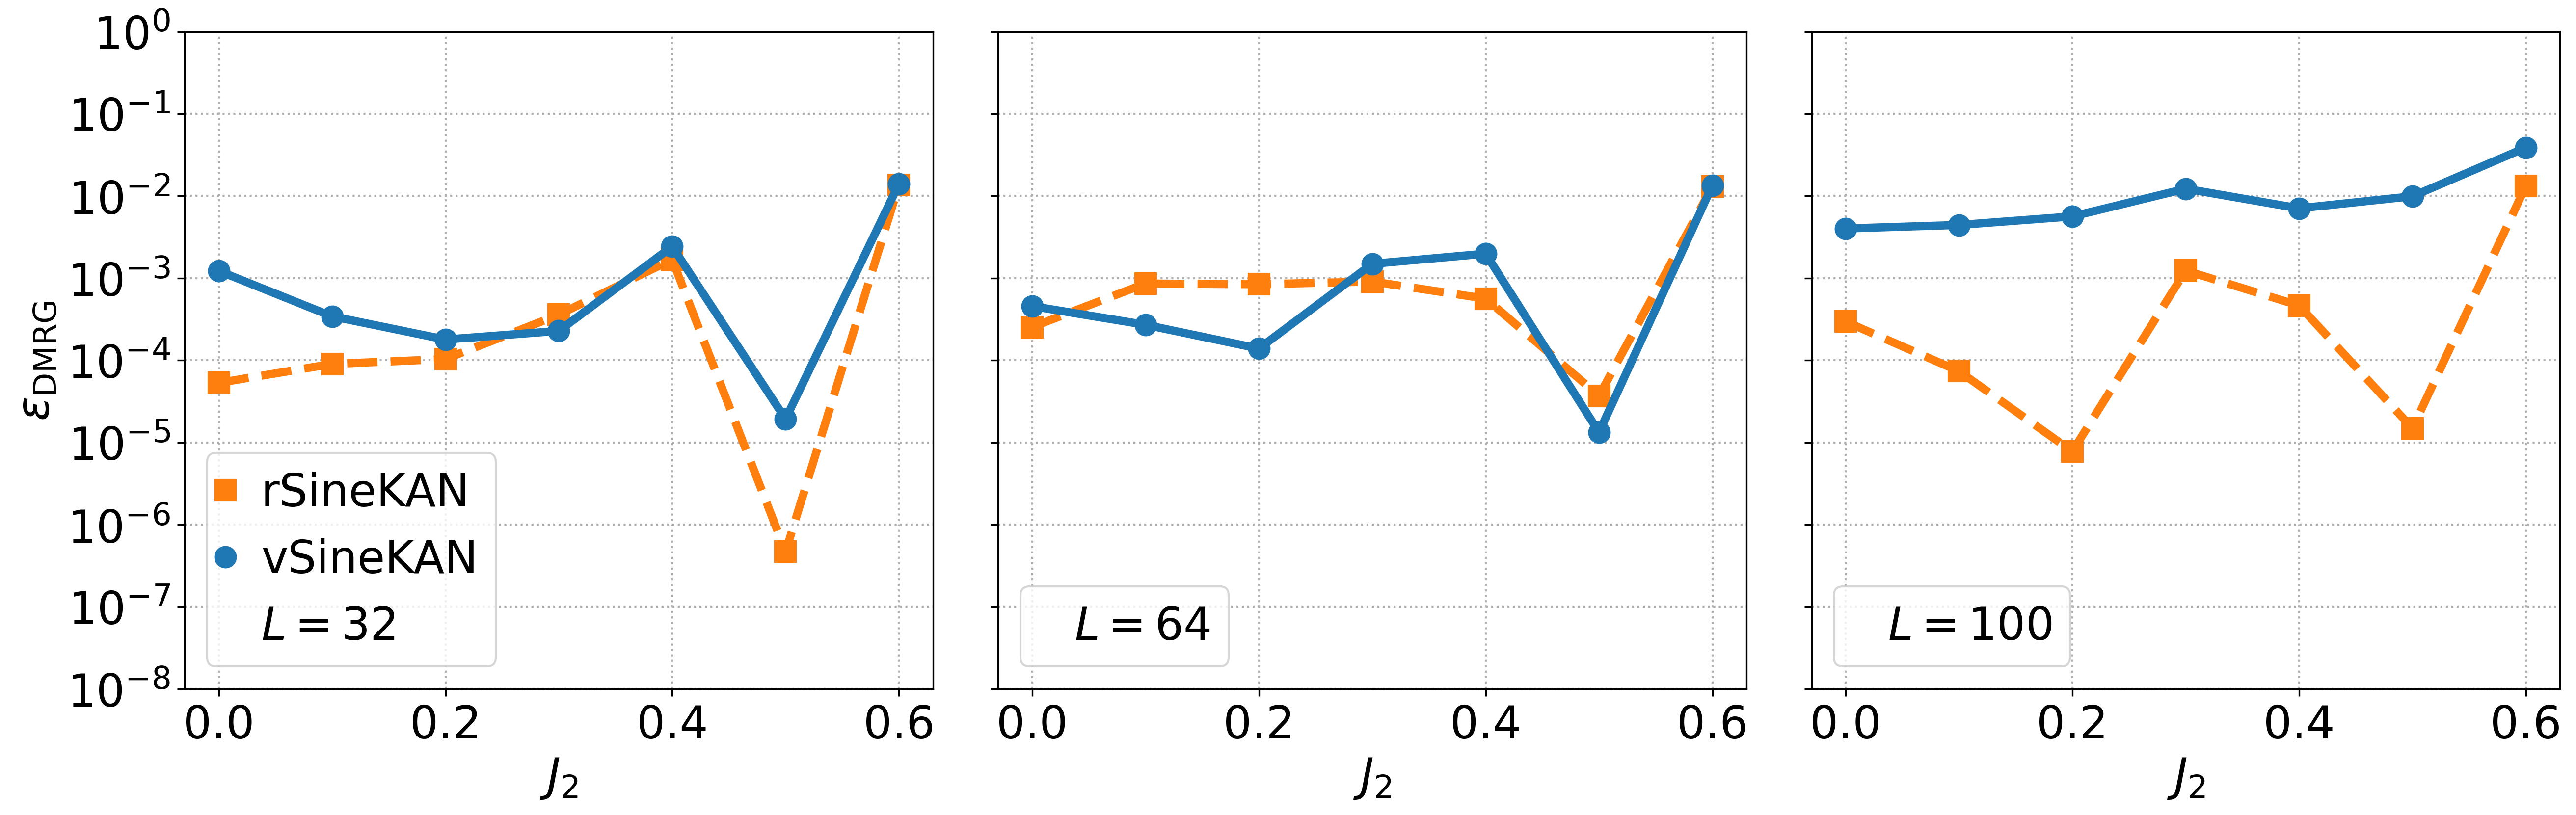

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "L32": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L_32_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L_32_Vanilla.csv",  # Corrected path
    },
    "L64": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L_64_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L_64_Vanilla.csv",  # Corrected path
    },
    "L100": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L_100_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L_100_Vanilla.csv",  # Corrected path
    },
}
# Load datasets
datasets_fixed = {}

for key, models in file_paths.items():
    datasets_fixed[key] = {}
    for model, path in models.items():
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()  # Remove any extra spaces in column names
        datasets_fixed[key][model] = df  # Store cleaned DataFrame

# Extract J2 and Error (epsilon)
for key in datasets_fixed:
    for model in datasets_fixed[key]:
        datasets_fixed[key][model] = datasets_fixed[key][model][["J2", "Error (epsilon)"]].dropna()

# 🎨 **Updated Code-1: Legend Inside the Middle Panel**
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

L_values = ["32", "64", "100"]

for i, (key, data) in enumerate(datasets_fixed.items()):
    axs[i].grid(which='major', linestyle=':', linewidth=1)
    plot1, = axs[i].plot(data["symmetric"]["J2"], data["symmetric"]["Error (epsilon)"],
                marker='s', linestyle='--', color='tab:orange', label='rSineKAN')
    plot2, = axs[i].plot(data["vanilla"]["J2"], data["vanilla"]["Error (epsilon)"],
                marker='o', linestyle='-', color='tab:blue', label='vSineKAN')
    dummy_handle = Line2D([], [], linestyle='none', marker=' ', label=f"$L={L_values[i]}$")
    axs[i].legend(handles=[plot1, plot2, dummy_handle] if i==0 else [dummy_handle], loc='lower left', handlelength=0)
    axs[i].set_xlabel("$J_2$")  # Increase font size
    axs[i].tick_params(axis='both', which='major')  # Increase tick size

    # Set the y-axis label only for the first (leftmost) subplot
    if i == 0:
        axs[i].set_ylabel(r"$\epsilon_{\mathrm{DMRG}}$")

    axs[i].set_yscale("log")  # Log scale for error


# Explicitly set y-axis ticks for log scale
for ax in axs:
    ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
    ax.set_yticklabels([r"$10^{-8}$", r"$10^{-7}$", r"$10^{-6}$", r"$10^{-5}$",
                        r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$"])

plt.tight_layout()
plt.show()


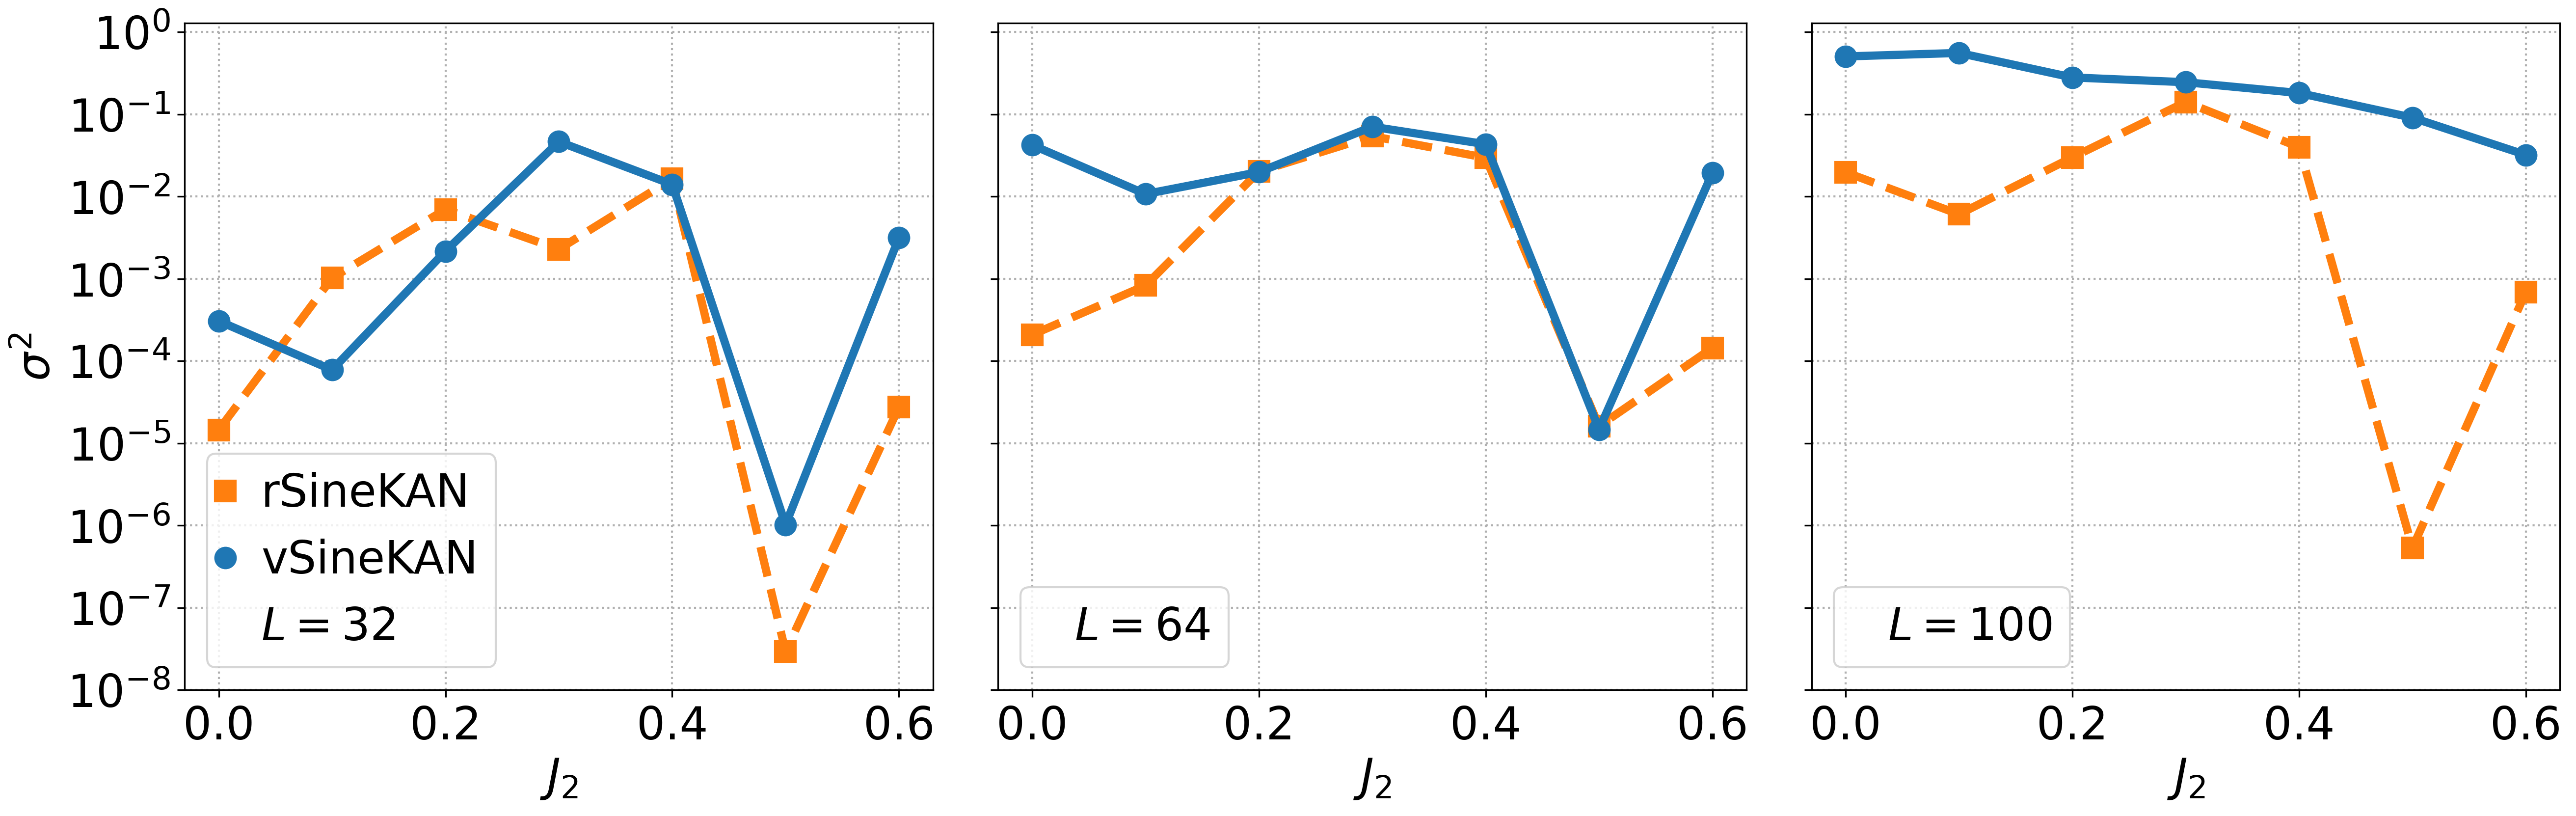

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "L32": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L_32_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L_32_Vanilla.csv",  # Corrected path
    },
    "L64": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L_64_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L_64_Vanilla.csv",  # Corrected path
    },
    "L100": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L_100_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L_100_Vanilla.csv",  # Corrected path
    },
}
# Load datasets
datasets_fixed = {}

for key, models in file_paths.items():
    datasets_fixed[key] = {}
    for model, path in models.items():
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()  # Remove any extra spaces in column names
        datasets_fixed[key][model] = df  # Store cleaned DataFrame

# 🎨 **Updated Code-1: Legend Inside the Middle Panel**
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

L_values = ["32", "64", "100"]

for i, (key, data) in enumerate(datasets_fixed.items()):
    axs[i].grid(which='major', linestyle=':', linewidth=1)
    plot1, = axs[i].plot(data["symmetric"]["J2"], data["symmetric"]["Symmetric Model Variance"],
                marker='s', linestyle='--', color='tab:orange', label='rSineKAN')
    plot2, = axs[i].plot(data["vanilla"]["J2"], data["vanilla"]["Vanilla Model Variance"],
                marker='o', linestyle='-', color='tab:blue', label='vSineKAN')
    dummy_handle = Line2D([], [], linestyle='none', marker=' ', label=f"$L={L_values[i]}$")
    axs[i].legend(handles=[plot1, plot2, dummy_handle] if i==0 else [dummy_handle], loc='lower left', handlelength=0)

    axs[i].set_xlabel("$J_2$")  # Increase font size
    axs[i].tick_params(axis='both', which='major')  # Increase tick size

    # Set the y-axis label only for the first (leftmost) subplot
    if i == 0:
        axs[i].set_ylabel(r"$\sigma^{2}$")

    axs[i].set_yscale("log")  # Log scale for error


# Explicitly set y-axis ticks for log scale
for ax in axs:
    ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
    ax.set_yticklabels([r"$10^{-8}$", r"$10^{-7}$", r"$10^{-6}$", r"$10^{-5}$",
                        r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$"])

plt.tight_layout()
plt.show()


# Explicitly set y-axis ticks for log scale
for ax in axs:
    ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
    ax.set_yticklabels([r"$10^{-8}$", r"$10^{-7}$", r"$10^{-6}$", r"$10^{-5}$",
                        r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$10^{0}$"])

plt.tight_layout()
plt.show()


In [ ]:
print(data)

{'symmetric':             Method      LR  No of params  Lattice Size   J2       DMRG  \
0              NaN  0.0010       86433.0           100  0.0 -44.322764   
1              NaN  0.0010       86433.0           100  0.1 -42.541626   
2              NaN  0.0010       86433.0           100  0.2 -40.857221   
3  Symmetric Model  0.0001       86433.0           100  0.3 -39.312578   
4              NaN  0.0001       86433.0           100  0.4 -38.018011   
5              NaN  0.0001       86400.0           100  0.5 -37.500000   
6              NaN  0.0001       86400.0           100  0.6 -38.065323   

   Symmetric Model  Symmetric Model Variance  Error (epsilon)   V-score  
0       -44.335900              1.970000e-02         0.000296  0.003178  
1       -42.538488              6.072612e-03         0.000074  0.001833  
2       -40.857539              2.984727e-02         0.000008  0.004228  
3       -39.263985              1.407322e-01         0.001236  0.009622  
4       -38.000377     

In [ ]:
# TFIM
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "L20": {
        "symmetric": "/content/drive/MyDrive/NQS/Plot/L20_TFIM_Symmetric.csv",  # Corrected path
        "vanilla": "/content/drive/MyDrive/NQS/Plot/L20_TFIM_Vanilla.csv",  # Corrected path
}}

TFIM

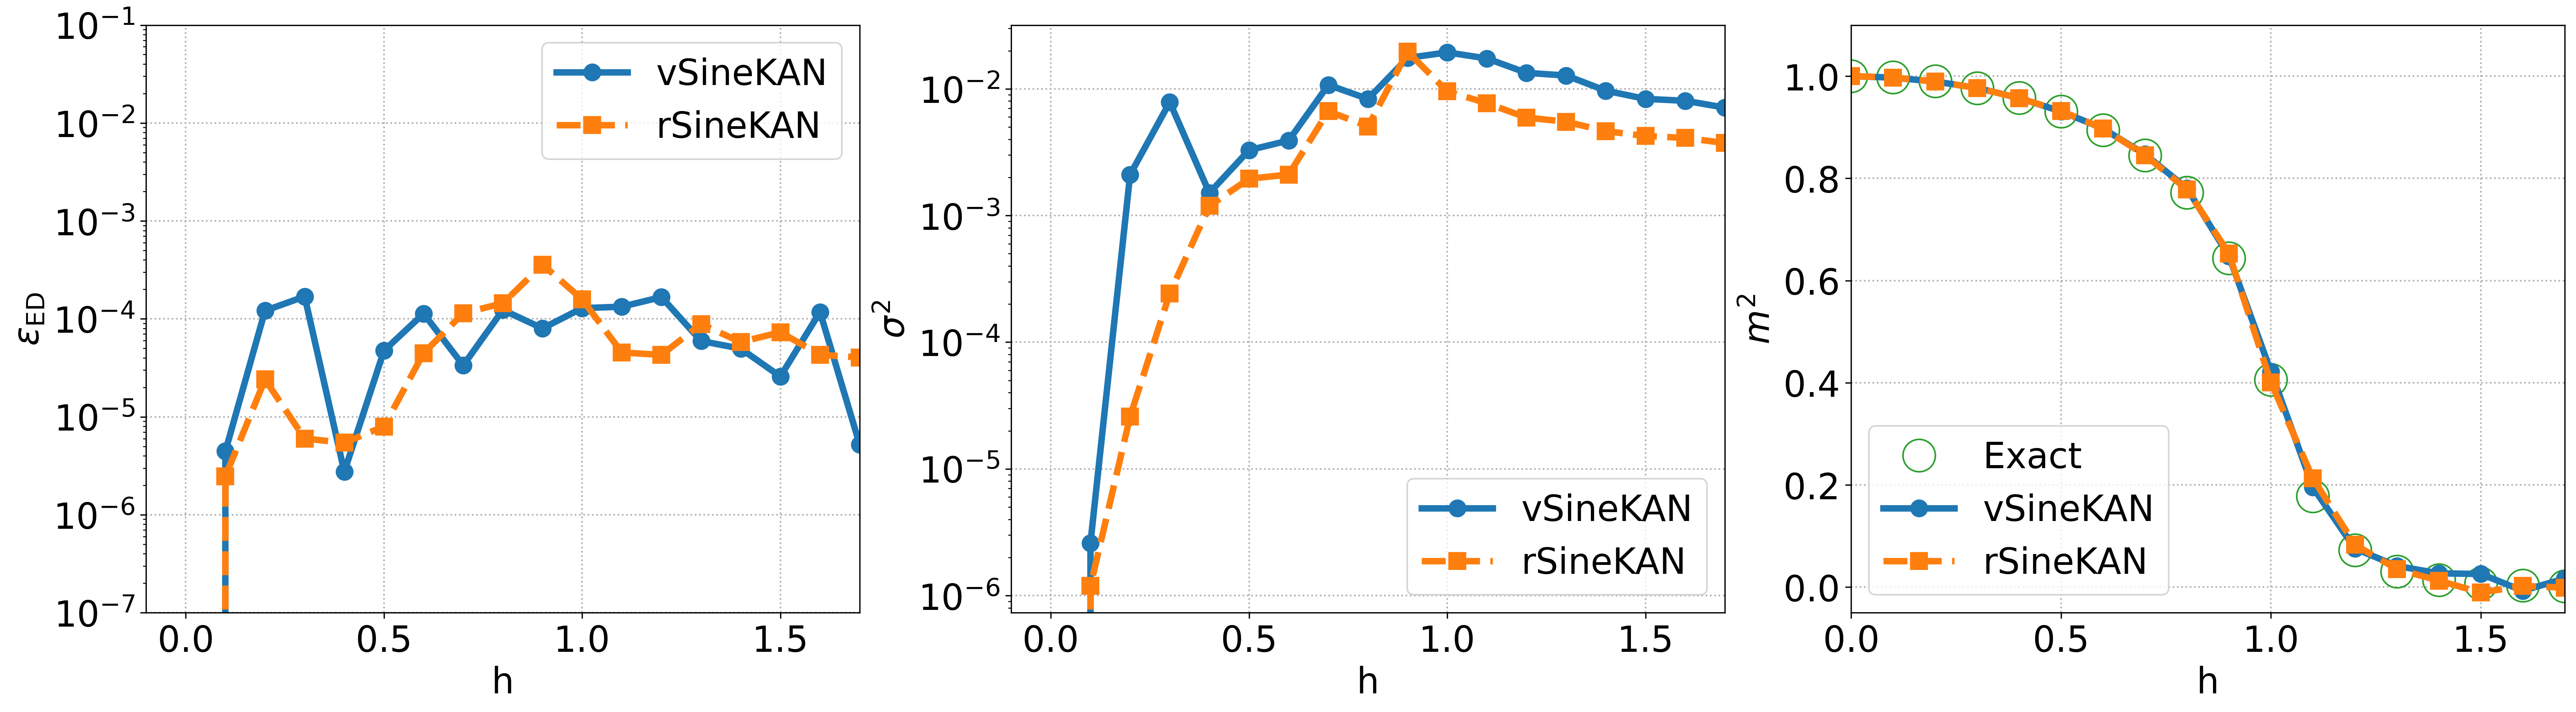

In [ ]:
# Plot TFIM
import pandas as pd
import matplotlib.pyplot as plt

# Apply clean, compact style
# plt.style.use("seaborn-v0_8")
# plt.style.use("classic")


# Load data from CSV
df_vanilla = pd.read_csv("/content/drive/MyDrive/NQS/Plot/L20_TFIM_Vanilla.csv")
df_symmetric = pd.read_csv("/content/drive/MyDrive/NQS/Plot/L20_TFIM_Symmetric.csv")

# Extract relevant columns
h_vanilla = df_vanilla["h"]
h_symmetric = df_symmetric["h"]

gs_error_vanilla = df_vanilla["GS Error"]
gs_error_symmetric = df_symmetric["GS Error"]

variance_vanilla = df_vanilla["Variance"]
variance_symmetric = df_symmetric["Variance"]

m2_vanilla = df_vanilla["Vanilla m^2"]
m2_symmetric = df_symmetric["Symmetric m^2"]
m2_exact = df_vanilla["ED m^2"]

# Create horizontal panel
fig, axs = plt.subplots(1, 3, figsize=(22, 6), constrained_layout=True)
marker_style = dict(markersize=10, linewidth=4)


# Plot 1: GS Energy Error
axs[0].plot(h_vanilla, gs_error_vanilla, label="vSineKAN", marker='o', **marker_style)
axs[0].plot(h_symmetric, gs_error_symmetric, label="rSineKAN", marker='s', linestyle='--', **marker_style)
axs[0].set_yscale('log')
axs[0].set_ylim(1e-7, 1e-1)  # Extend lower bound so smallest value is visible
axs[0].set_xlabel("h")
axs[0].set_ylabel(r"$\epsilon_{\mathrm{ED}}$")
axs[0].legend()
axs[0].set_xlim(right=1.7)
axs[0].grid(which='major', linestyle=':', linewidth=1)


# Plot 2: Variance
axs[1].plot(h_vanilla, variance_vanilla, label="vSineKAN", marker='o', **marker_style)
axs[1].plot(h_symmetric, variance_symmetric, label="rSineKAN", marker='s', linestyle='--', **marker_style)
axs[1].set_yscale('log')
axs[1].set_xlabel("h")
axs[1].set_ylabel(r"$\sigma^2$")
axs[1].legend()
axs[1].set_xlim(right=1.7)
axs[1].grid(which='major', linestyle=':', linewidth=1)


# Plot 3: m^2
axs[2].set_ylim(top=1.1)
axs[2].set_xlim(right=1.7)
axs[2].plot(h_vanilla, m2_exact, label="Exact", color="tab:green", marker = "o", fillstyle='none', linestyle='', linewidth=4, markersize=20)
axs[2].plot(h_vanilla, m2_vanilla, label="vSineKAN", color="tab:blue", marker='o', **marker_style)
axs[2].plot(h_symmetric, m2_symmetric, label="rSineKAN", color="tab:orange", marker='s', linestyle='--', **marker_style)
axs[2].set_xlabel("h")
axs[2].set_ylabel(r"$m^2$")
axs[2].set_ylim(-0.05, 1.1)
axs[2].grid(which='major', linestyle=':', linewidth=1)
axs[2].legend(loc = "lower left")

plt.show()


In [ ]:
import io
import pandas as pd
van_var = pd.read_csv(io.StringIO('''
0.0141
0.0029
0.00007
0.00062
0.0034
0.00016
0.00006
0.00001
'''), header=None)


gam = pd.read_csv(io.StringIO('''
-0.2
-0.1
0.3
0.4
0.5
0.6
0.7
0.8
'''), header=None)

van_error = pd.read_csv(io.StringIO('''
0.01003539479
0.005465077168
0.00009653837173
0.03553999389
0.03684496867
0.03535564664
0.02958371119
0.02057417193
'''), header=None)

sym_var = pd.read_csv(io.StringIO('''
0.00001
0.000005
0.00007
0.00045
0.00016
0.00007
0.000009
0.000006
'''), header=None)

sym_error = pd.read_csv(io.StringIO('''
0.004168125212
0.001568397226
0.00009653837173
0.0006681423528
0.0001148224872
0.0000107529113
0.000007047059938
0.0000002148180309
'''), header=None)


Fidelity of the AHM Model

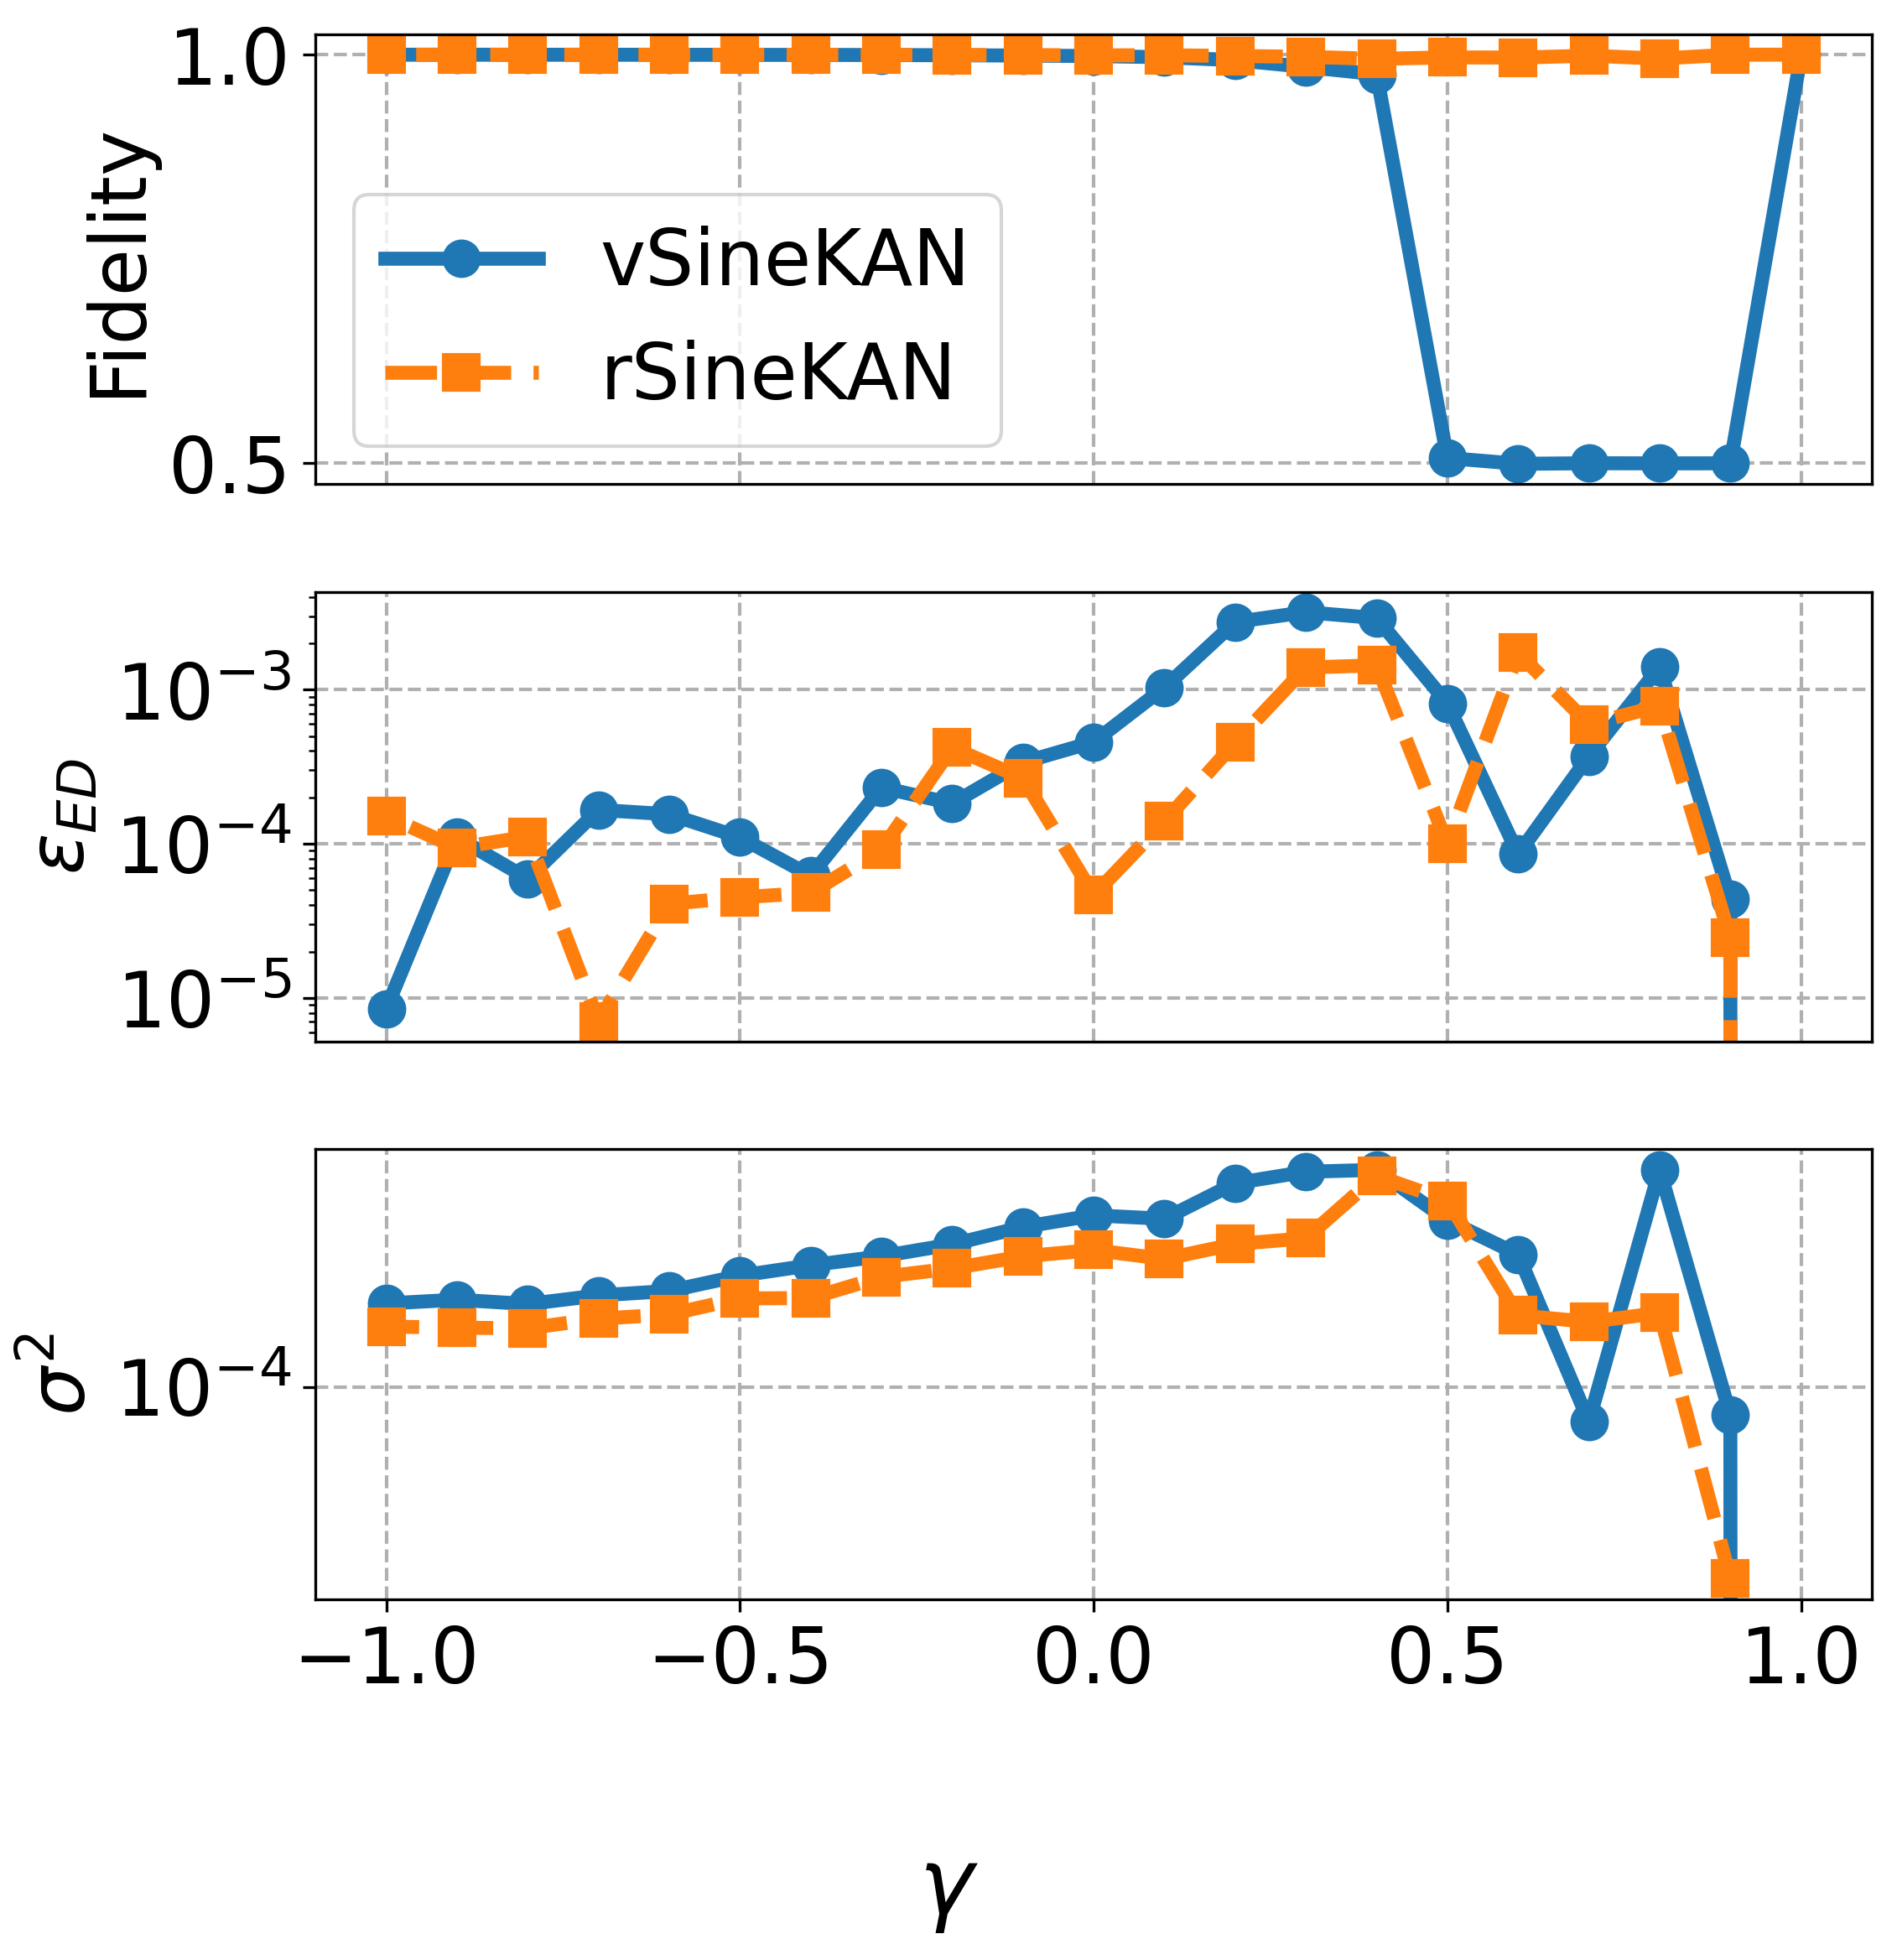

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

df_fid = pd.read_csv(io.StringIO('''
gamma,ED,Sym,Sym Error,Sym Var,Sym Fid,Vanilla,Vanilla Error,Vanilla Var,Vanilla Fid
1,-10,-10,0,0,1,-10,0,0,1
0.9,-9.526297565,-9.526063574,0.00002456265914,5.87E-07,0.9999492924,-9.525881188,0.00004370816649,4.68E-05,0.4999029356
0.8,-9.110768223,-9.11791499,0.0007844307335,0.000724913,0.995284554,-9.097993594,0.001402146195,0.033583313,0.4998639619
0.7,-8.762648751,-8.757421,0.0005965948594,0.0005691756,0.9987018628,-8.759406259,0.0003700356014,3.95E-05,0.4999858224
0.6,-8.492273191,-8.477540585,0.001734824807,0.0006805383,0.996458201,-8.491546103,0.00008561759421,0.003467431,0.4993255545
0.5,-8.311107504,-8.311935841,0.00009966623577,0.0146732594,0.9966456178,-8.304335471,0.0008148171585,0.008678143,0.5063886631
0.4,-8.232143178,-8.22029394,0.001439386833,0.0284687269,0.994905508,-8.208159567,0.002913410333,0.033417146,0.9760426605
0.3,-8.266312696,-8.254795879,0.001393222943,0.0053446687,0.9973639482,-8.239982993,0.003185181068,0.031729272,0.9850173934
0.2,-8.407244482,-8.40343274,0.0004533878143,0.0045883218,0.9984069558,-8.384121698,0.002750340418,0.023362027,0.9933174238
0.1,-8.628564172,-8.627357725,0.0001398201457,0.0030735877,0.9992858016,-8.619649763,0.001033127786,0.009012703,0.9968572443
0,-8.90438653,-8.904800259,0.00004646349287,0.0039039191,0.9991551512,-8.900309642,0.000457851609,0.0098839908,0.9983344756
-0.1,-9.217933011,-9.21548006,0.0002661063383,0.0032957812,0.9995608409,-9.221046213,0.0003377332637,0.0072345854,0.9988942185
-0.2,-9.558985304,-9.554966188,0.0004204541667,0.0023820818,0.999638514,-9.560731966,0.0001827247082,0.0045492249,0.9993113989
-0.3,-9.921000253,-9.921909057,0.00009160407992,0.0019003704,0.9997721091,-9.918699329,0.0002319245178,0.0033006066,0.9995579497
-0.4,-10.29952788,-10.29903235,0.00004811272959,0.0010790767,0.9998618217,-10.30016728,0.00006208049603,0.0025977795,0.9997116788
-0.5,-10.69139163,-10.6909119,0.00004487037017,0.0010678698,0.9998943781,-10.6902142,0.0001101289281,0.0019655426,0.9997748267
-0.6,-11.09423868,-11.09469122,0.0000407908657,0.0006955808,0.9999386569,-11.09251478,0.0001553871744,0.0013049646,0.9998581336
-0.7,-11.50627579,-11.50635692,0.000007050361165,0.0006210725,0.9999311155,-11.50436571,0.0001660034345,0.001157625,0.9999003399
-0.8,-11.92610458,-11.92477938,0.0001111174476,0.0004801861,0.9999501205,-11.92681301,0.00005940177662,0.0009191842,0.9999013544
-0.9,-12.35261383,-12.35377724,0.00009418401777,0.000488278,0.9999688308,-12.35397313,0.0001100416008,0.0010321733,0.9999338218
-1,-12.78490644,-12.7868415,0.0001513549128,0.0005031839,0.9999694295,-12.78479774,0.000008502119314,0.0009329614,0.9999226851
'''), header=0)


# print(df_fid)

#df_fid = pd.read_csv(io.StringIO(df_fid))

# x-axis: J2 values (assumed based on index)
# x-axis: J2 values (assumed based on index)
gamma_values = df_fid['gamma']

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
for ax in axs[:3]:
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axs[0].grid(which='major', linestyle='--', linewidth=1)
axs[1].grid(which='major', linestyle='--', linewidth=1)
axs[2].grid(which='major', linestyle='--', linewidth=1)
# Plot fidelity
axs[0].plot(gamma_values, df_fid["Vanilla Fid"], 'o-', label="vSineKAN")
axs[0].plot(gamma_values, df_fid["Sym Fid"], 's--', label="rSineKAN")
fig.supxlabel("$\gamma$")
axs[0].set_ylabel("Fidelity")
axs[0].legend(loc='lower left')

axs[1].plot(gamma_values, df_fid["Vanilla Error"], 'o-', color="tab:blue", label="vSineKAN")
axs[1].plot(gamma_values, df_fid["Sym Error"], 's--', color="tab:orange", label="rSineKAN")
axs[1].set_ylabel("$\epsilon_{ED}$")
axs[1].set_yscale('log')

axs[2].plot(gamma_values, df_fid["Vanilla Var"], 'o-', color="tab:blue", label="vSineKAN")
axs[2].plot(gamma_values, df_fid["Sym Var"], 's--', color="tab:orange", label="rSineKAN")
axs[2].set_ylabel("$\sigma^2$")
axs[2].set_yscale('log')



plt.tight_layout()
plt.show()


Fidelity of the $J_{1}-J_{2}$ Model

In [ ]:
print(df_E)

   Exact GS Energy  Sym Model  Vanilla Model
0        -8.904387  -8.902150      -8.905500
1        -8.544138  -8.541125      -8.544400
2        -8.544138  -8.203425      -8.203375
3        -7.889131  -7.887750      -7.882000
4        -7.625433  -7.627000      -7.597500
5        -7.500000  -7.499892      -7.499890
6        -7.617629  -7.512213       7.512125


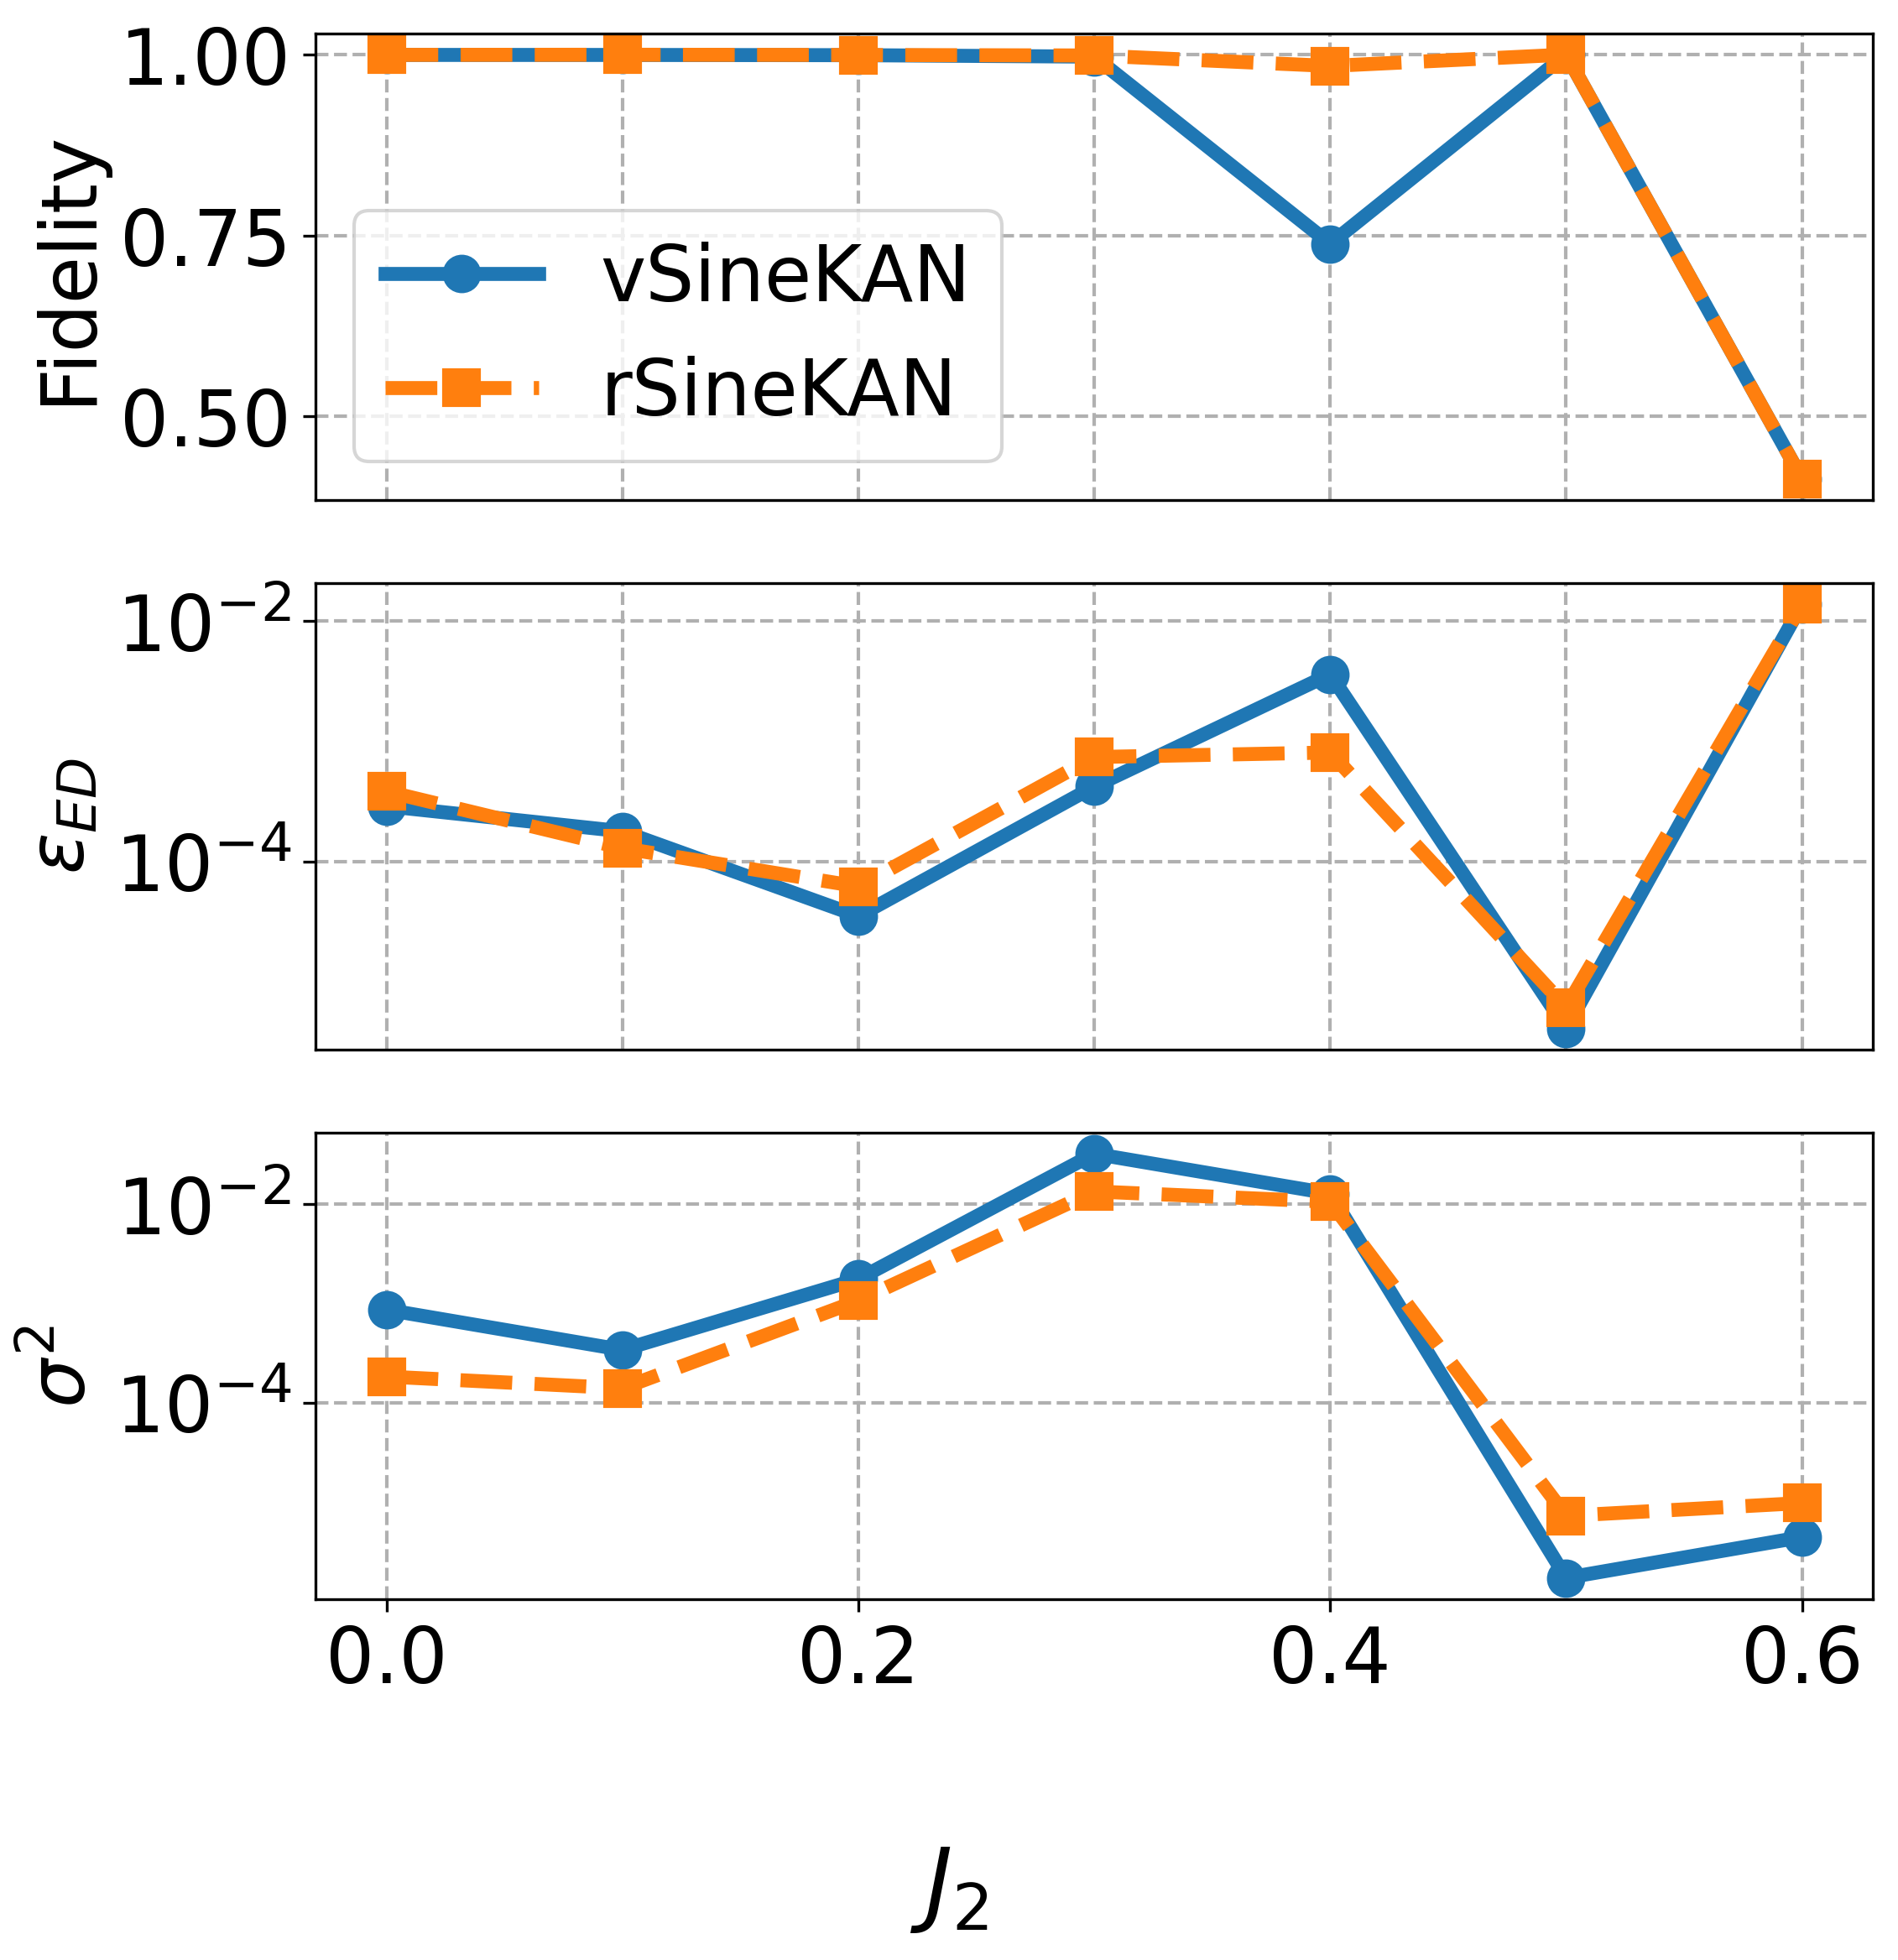

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

df_fid = pd.read_csv(io.StringIO('''
Exact GS Energy,Sym Model,Vanilla Model,Error Sym,Error Vanilla,Sym Variance,Vanilla Variance,GS Fidelity Sym Model,GS Fidelity Vanilla Model
-8.90438653,-8.900967551,-8.906960499,0.0003839656916,0.0002890675269,0.0001846193564,0.00086534762,0.9995901021,0.9995480147
-8.544138361,-8.545244049,-8.542612567,0.0001294090167,0.0001785778517,0.0001409752338,0.0003423487929,0.999783428,0.9995089789
-8.202916252,-8.202407064,-8.202627507,0.00006207406813,0.00003520033689,0.001067742507,0.001757947954,0.9994710032,0.9991797421
-7.889130881,-7.883292072,-7.885808837,0.0007401079911,0.0004210912755,0.01332817768,0.03182450329,0.9987541907,0.9971744285
-7.625432799,-7.619275232,-7.597867546,0.0008075038703,0.003614909941,0.01049017066,0.01265166499,0.9843167606,0.7385221597
-7.5,-7.500046007,-7.499969167,0.000006134291961,0.00000411106406,7.39E-06,1.76E-06,0.9999985407,0.9999995491
-7.617629388,-7.512580079,-7.512337681,0.01379028872,0.01382210936,9.93E-06,4.52E-06,0.4141901815,0.4141790232
'''), header=0)


# print(df_fid)

#df_fid = pd.read_csv(io.StringIO(df_fid))

# x-axis: J2 values (assumed based on index)
# x-axis: J2 values (assumed based on index)
J2_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

fig, axs = plt.subplots(3, 1, figsize=(8, 8))
for ax in axs[:2]:
    ax.set_xticks([0.0, 0.1,0.2, 0.3, 0.4, 0.5, 0.6])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0].grid(which='major', linestyle='--', linewidth=1)
axs[1].grid(which='major', linestyle='--', linewidth=1)
axs[2].grid(which='major', linestyle='--', linewidth=1)
# Plot fidelity
axs[0].plot(J2_values, df_fid["GS Fidelity Vanilla Model"], 'o-', label="vSineKAN")
axs[0].plot(J2_values, df_fid["GS Fidelity Sym Model"], 's--', label="rSineKAN")
fig.supxlabel("$J_2$")
axs[0].set_ylabel("Fidelity")
axs[0].legend(loc='lower left')

axs[1].plot(J2_values, df_fid["Error Vanilla"], 'o-', color="tab:blue", label="vSineKAN")
axs[1].plot(J2_values, df_fid["Error Sym"], 's--', color="tab:orange", label="rSineKAN")
axs[1].set_ylabel("$\epsilon_{ED}$")
# axs[1].legend(loc = 'upper left')
axs[1].set_yscale('log')

axs[2].plot(J2_values, df_fid["Vanilla Variance"], 'o-', color="tab:blue", label="vSineKAN")
axs[2].plot(J2_values, df_fid["Sym Variance"], 's--', color="tab:orange", label="rSineKAN")
axs[2].set_ylabel("$\sigma^2$")
# axs[2].legend(loc = 'upper left')
axs[2].set_yscale('log')
# plt.title("Ground State Fidelity vs $J_2$ (L = 20)")
#plt.grid(True)
plt.tight_layout()
plt.show()


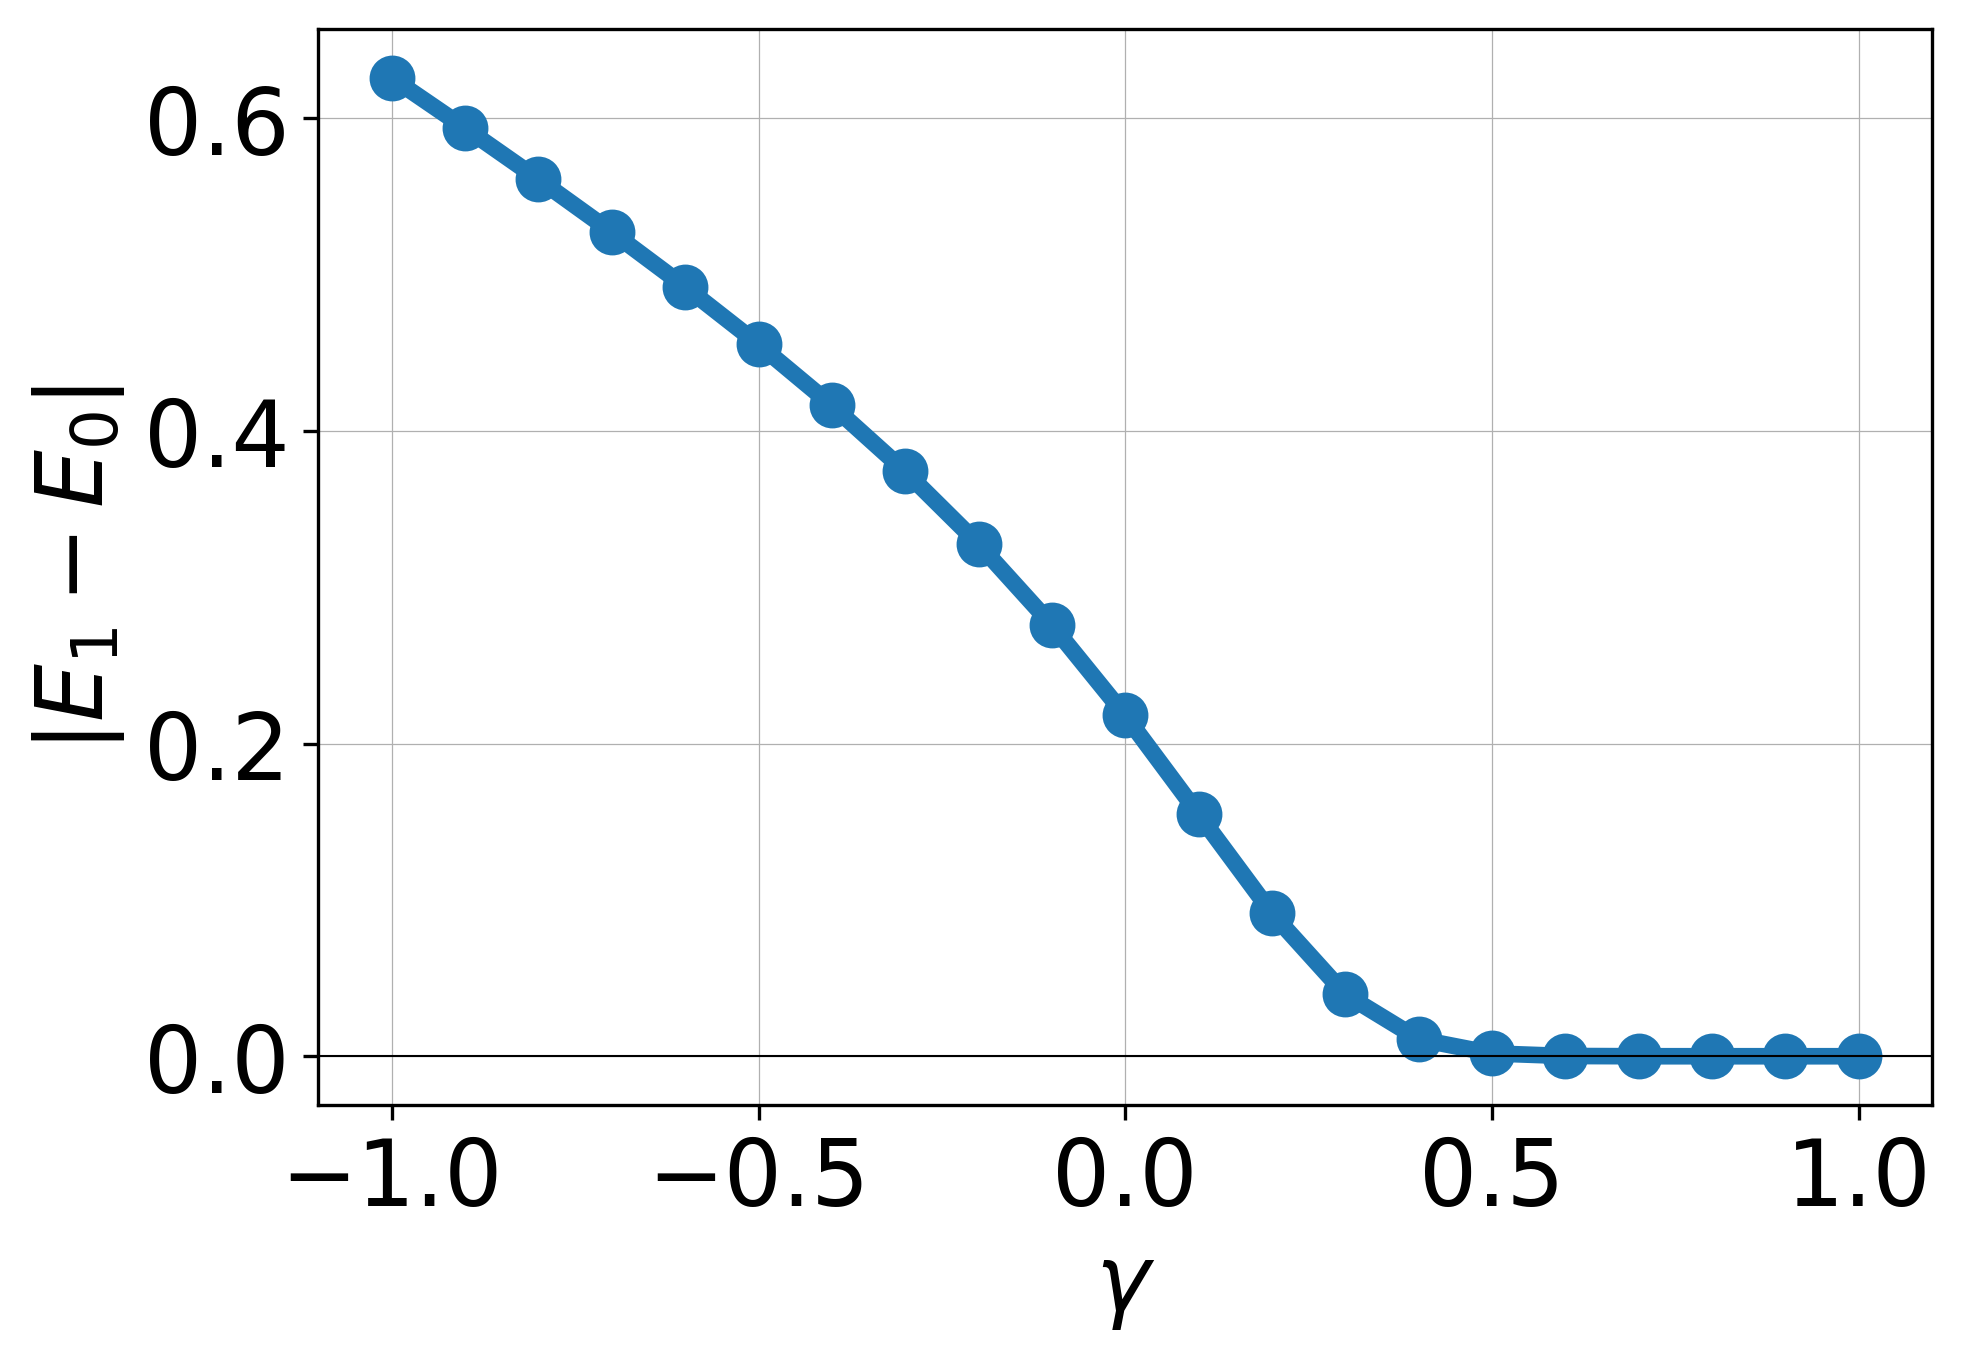

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO('''
gamma,GS ED,1st Excited state ED
1,-10,-10
0.9,-9.526297565,-9.526298
0.8,-9.110768223,-9.110768
0.7,-8.762648751,-8.762642
0.6,-8.492273191,-8.492106
0.5,-8.311107504,-8.309293
0.4,-8.232143178,-8.221164
0.3,-8.266312696,-8.226723
0.2,-8.407244482,-8.315793
0.1,-8.628564172,-8.47374
0,-8.90438653,-8.686441
-0.1,-9.217933011,-8.942115
-0.2,-9.558985304,-9.231386
-0.3,-9.921000253,-9.546957
-0.4,-10.29952788,-9.883246
-0.5,-10.69139163,-10.236036
-0.6,-11.09423868,-10.602145
-0.7,-11.50627579,-10.979162
-0.8,-11.92610458,-11.365242
-0.9,-12.35261383,-11.758953
-1,-12.78490644,-12.159169
'''), header=0)


# Plot ΔE vs γ
plt.figure(figsize=(7,5))
plt.plot(df["gamma"], abs(df["GS ED"] - df["1st Excited state ED"]), 'o-')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$|E_1 - E_0|$')
plt.axhline(0, color='k', lw=0.5)
plt.grid(True, lw=0.3)
plt.tight_layout()
plt.show()

Isotropic Spin-Spin Correlation

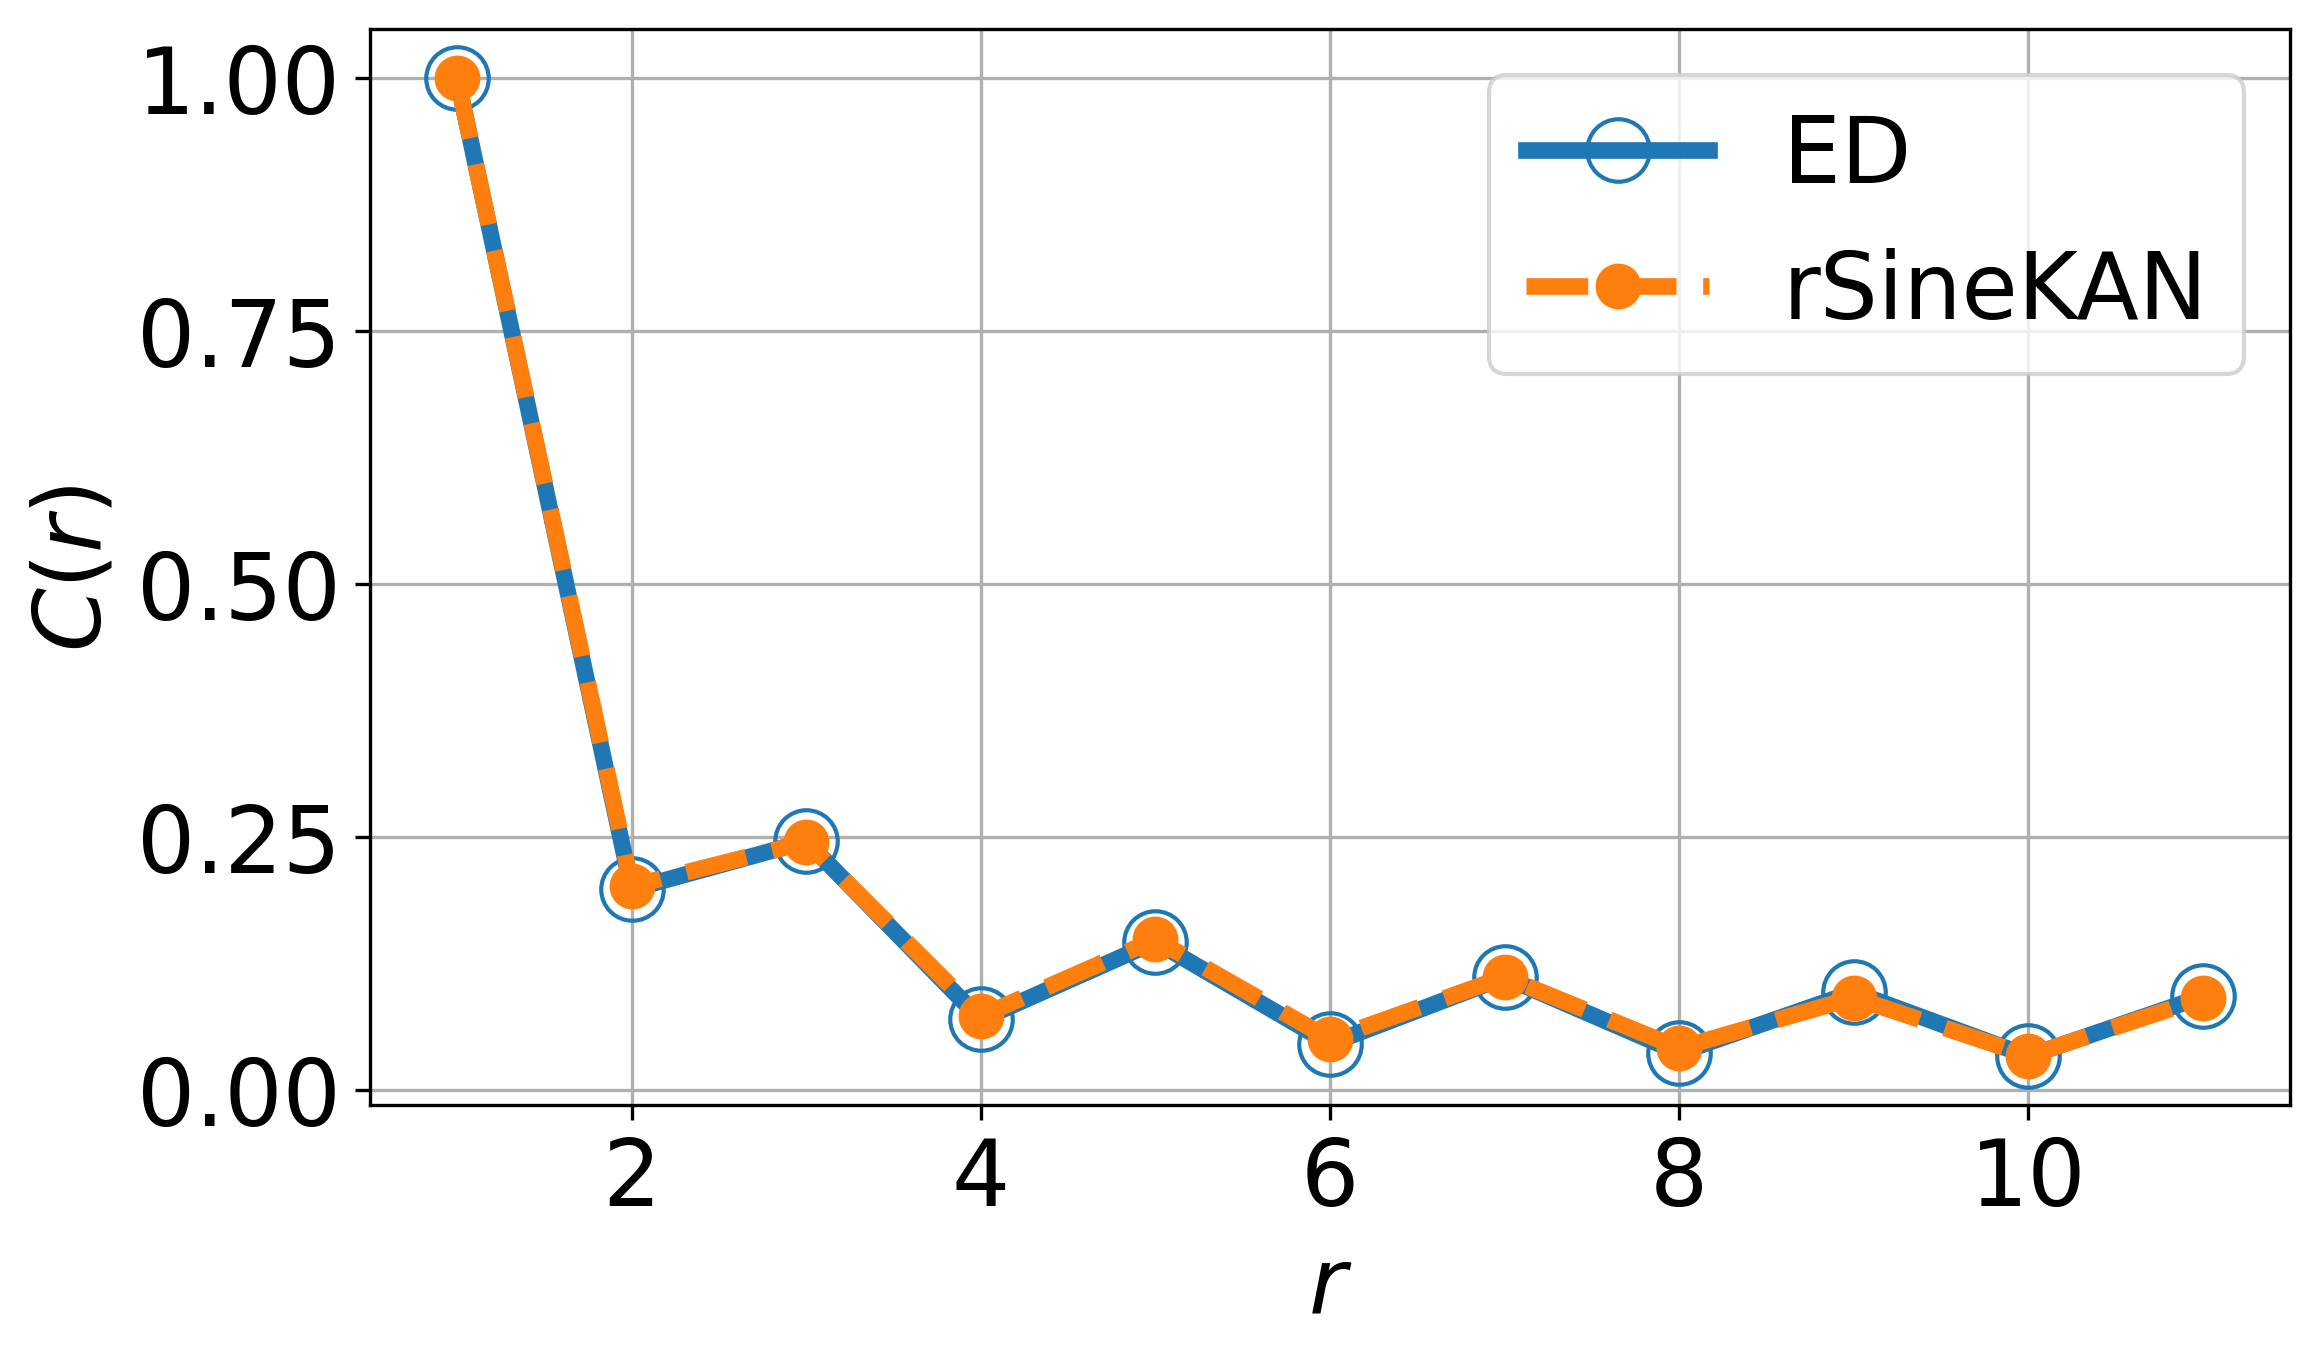

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

df_iso = pd.read_csv(io.StringIO('''
Length,Correlator,r,J2 = 0.0 ED C_r,J2 = 0.0 Sym C_r
,,1,1,1
,,2,0.1978752562,0.2011520623
,,3,0.2454028907,0.2446747187
,,4,0.06926496379,0.07263830682
20,Isotropic Spin-Spin,5,0.1460173017,0.1483550326
,,6,0.04524430262,0.04978693315
,,7,0.1109631851,0.1112716009
,,8,0.03628721176,0.04094430538
,,9,0.09627466516,0.09078725729
,,10,0.03289649323,0.03334225621
,,11,0.09209328046,0.09032254742
'''), header=None)




# Assign column names to the DataFrame
df_iso.columns = ['Length', 'Correlator', 'r', 'ED', 'Sym']

# Remove the first row (which has string 'r' instead of numeric value)
df_iso_clean = df_iso[df_iso['r'] != 'r'].copy()

# Now convert relevant columns to float
df_iso_clean[['r', 'ED', 'Sym']] = df_iso_clean[['r', 'ED', 'Sym']].astype(float)

# Plot the correlation functions
plt.figure(figsize=(8, 5))
plt.plot(df_iso_clean['r'], df_iso_clean['ED'], marker='o', fillstyle="none", markersize=15, label='ED')
plt.plot(df_iso_clean['r'], df_iso_clean['Sym'], marker='o', linestyle="--", label='rSineKAN')
plt.xlabel(r'$r$')
plt.ylabel(r'$C(r)$')
#plt.title('Isotropic Spin–Spin Correlation at $J_2 = 0.0$ ($L = 20$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

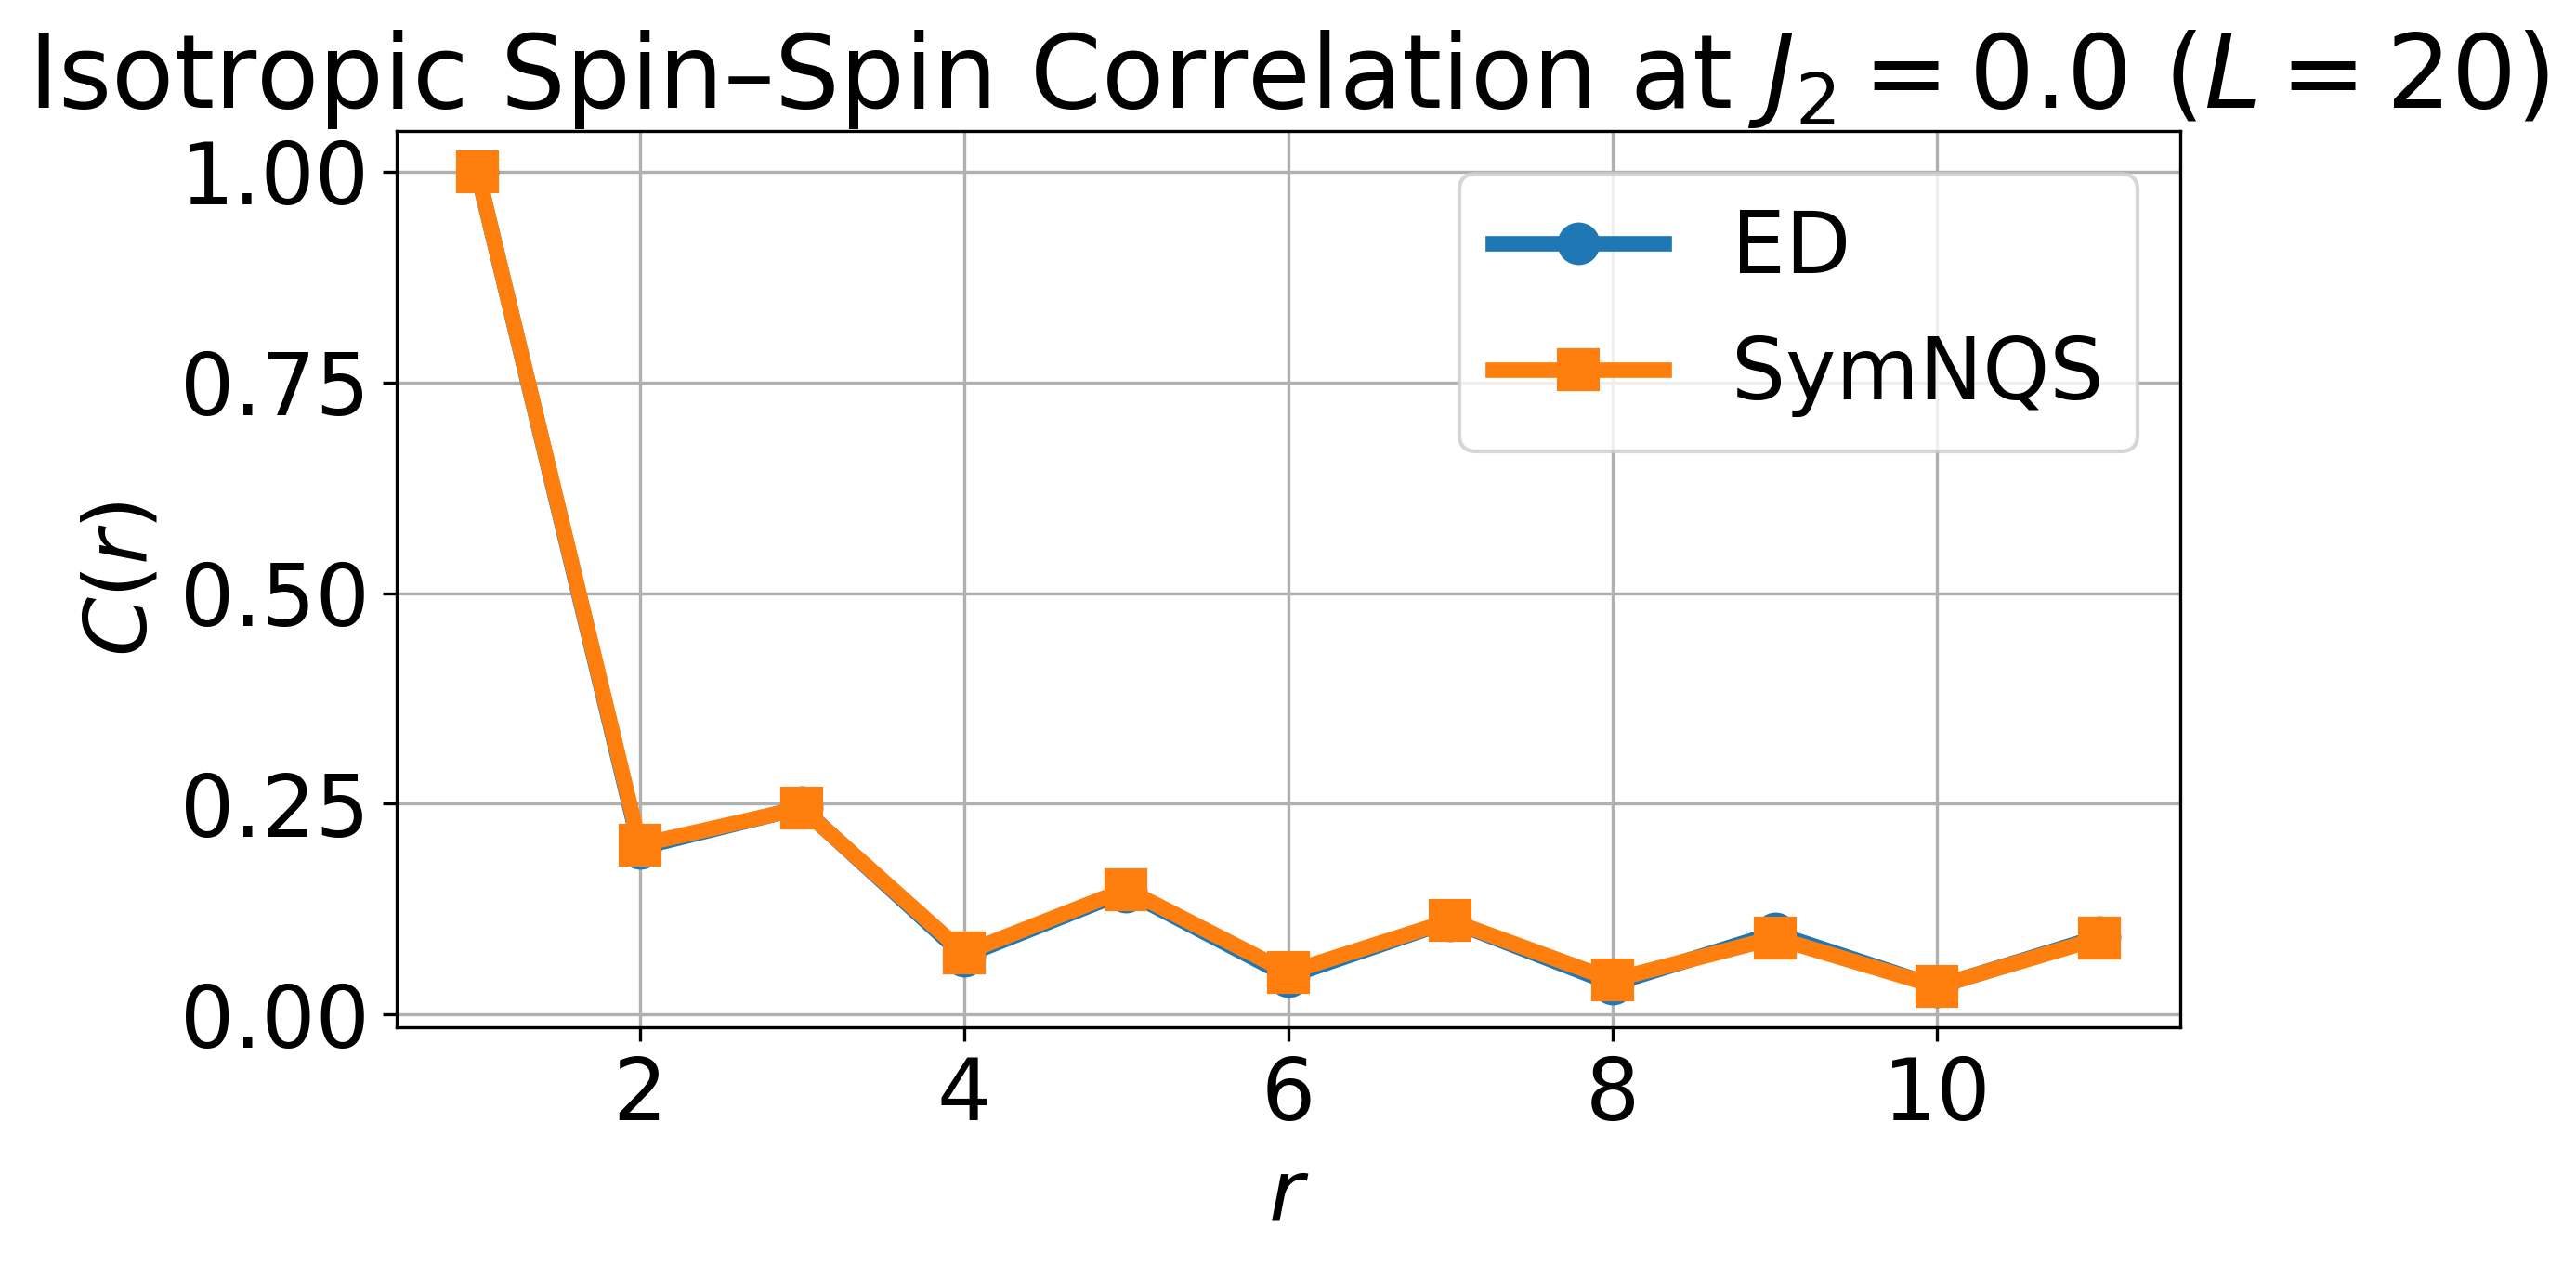

In [ ]:
# Remove the row that contains the string 'r' as a header
df_iso_clean = df_iso[df_iso['r'] != 'r'].copy()

# Convert relevant columns to float
df_iso_clean[['r', 'ED', 'Sym']] = df_iso_clean[['r', 'ED', 'Sym']].astype(float)

# Plot the correlation functions
plt.figure(figsize=(8, 5))
plt.plot(df_iso_clean['r'], df_iso_clean['ED'], marker='o', label='ED')
plt.plot(df_iso_clean['r'], df_iso_clean['Sym'], marker='s', label='SymNQS')
plt.xlabel(r'$r$')
plt.ylabel(r'$C(r)$')
plt.title('Isotropic Spin–Spin Correlation at $J_2 = 0.0$ ($L = 20$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


MSR Error Analysis

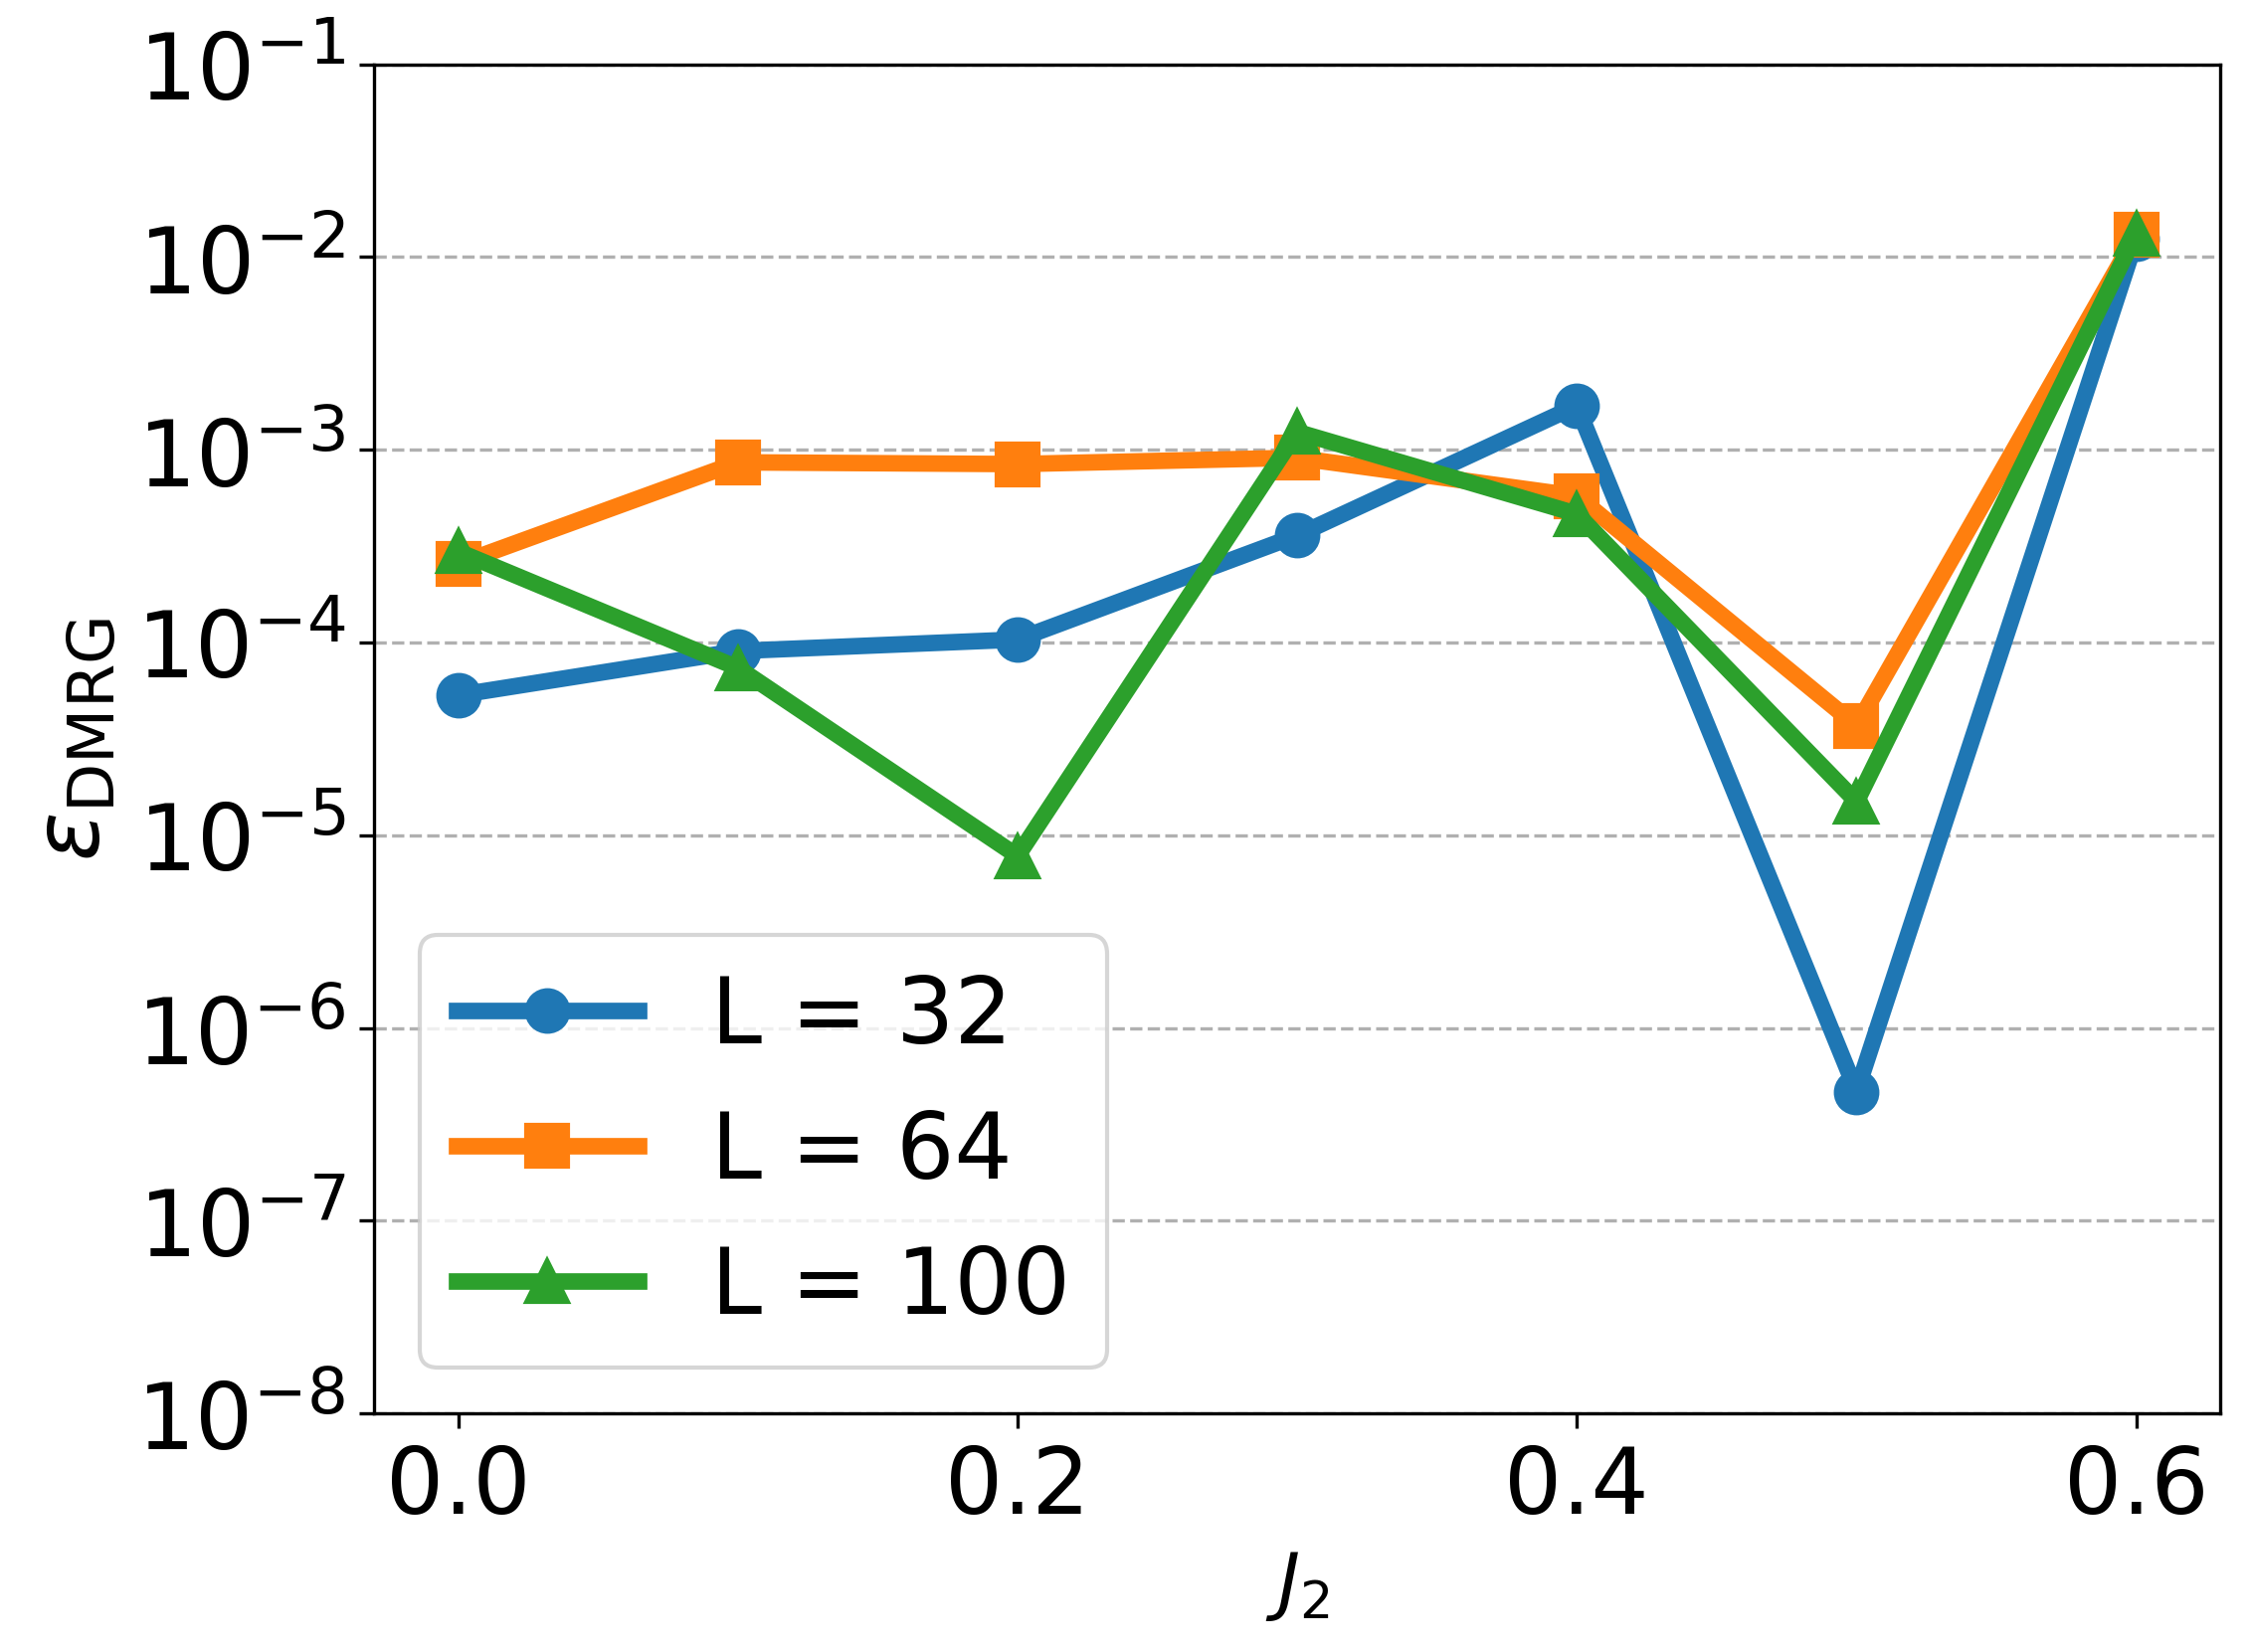

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

df_msr = pd.read_csv(io.StringIO('''
L,J2,Error
32,0,0.00005325047126
32,0.1,0.00009025624085
32,0.2,0.0001035115027
32,0.3,0.0003592558318
32,0.4,0.001689468471
32,0.5,0.0000004675644167
32,0.6,0.01238269154
64,0,0.0002550363897
64,0.1,0.0008596975038
64,0.2,0.0008416552906
64,0.3,0.0009076564437
64,0.4,0.0005746331561
64,0.5,0.00003697628339
64,0.6,0.01299845306
100,0,0.0002963830163
100,0.1,0.00007376356626
100,0.2,0.000007793042729
100,0.3,0.001236070943
100,0.4,0.0004638289448
100,0.5,0.00001491772563
100,0.6,0.01320101952
'''), header=0)
markers = ['o', 's', '^']
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

for i, L in enumerate(sorted(df_msr["L"].unique())):
    subset = df_msr[df_msr["L"] == L]
    ax.plot(subset["J2"], subset["Error"], marker=markers[i], label=f"L = {L}")
ax.set_yscale("log")
ax.set_ylim(1e-8, 1e-1)
ax.set_yticks(ticks=(1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1))
ax.set_yticklabels([r"$10^{-8}$", r"$10^{-7}$", r"$10^{-6}$", r"$10^{-5}$",
                    r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$"])
ax.grid(visible=True, which="both", linestyle='--', axis='y')

# Add vertical line at J2 = 0.5 to indicate MSR breakdown
#ax.axvline(x=0.5, color='red', linestyle='--', label="MSR boundary ($J_2 = 0.5$)")

ax.set_xlabel("$J_2$",fontsize=18)
ax.set_ylabel("$\epsilon_{\mathrm{DMRG}}$")
#ax.set_title("Model Error vs $J_2$ for Different System Sizes $L$")
#ax.legend(fontsize=12,labelsize=12)
# ax.tick_params(axis='both')
ax.legend(loc='lower left')

#ax.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
# Set DPI to 300 for saving
# plt.savefig('my_plot.png', dpi=300)
plt.show()

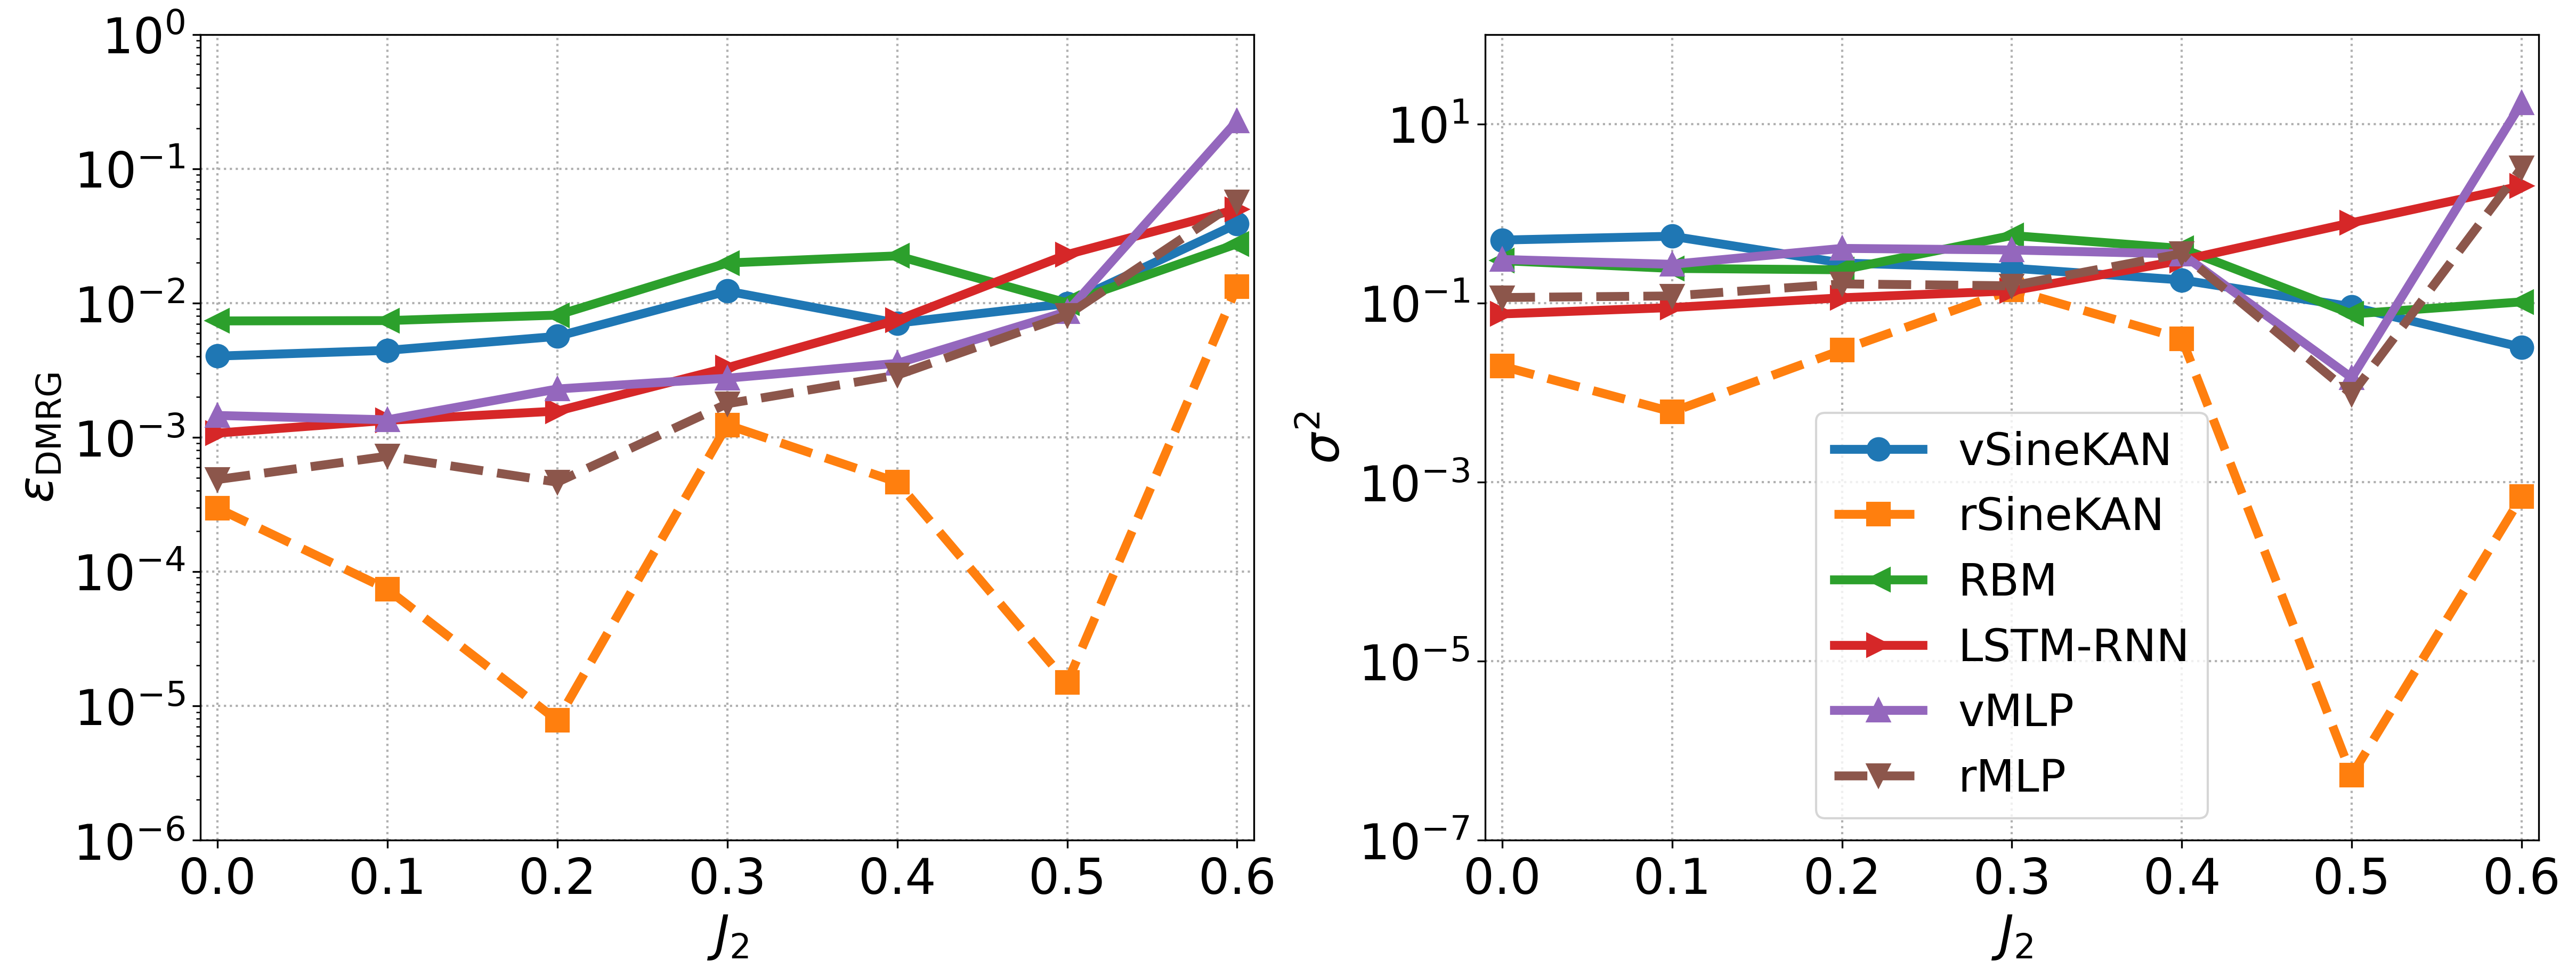

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO('''
rSineKAN Var,rSineKAN Err,RBM Var,RBM Err,RNN Var,RNN Err,vSineKAN Var,vSineKAN Err,vMLP Var,vMLP Err,rMLP Var,rMLP Err
0.01967314329,0.0002963830163,0.2968287628,0.007347835917,0.07541352323,0.001075260792,0.5042076527,0.004022461474,0.3061018256,0.001453239603,0.1150286512,0.0004846444356
0.006072611566,0.00007376356626,0.2430854291,0.00739135738,0.08890832935,0.001335816559,0.5562286178,0.004437651499,0.2702582306,0.001349100441,0.1197911219,0.0007231154099
0.02984726853,0.000007793042729,0.2346645952,0.008117520517,0.1142312635,0.001567316692,0.2797303126,0.00563914014,0.4070468833,0.002288968887,0.1633351972,0.0004631056276
0.1407322082,0.001236070943,0.5669226841,0.01984494137,0.1367078873,0.003295157272,0.2447865076,0.0122551891,0.3904532835,0.002754256706,0.1554360347,0.001777028323
0.03974645845,0.0004638289448,0.4060361275,0.02242678003,0.2994017223,0.007454044959,0.1807425105,0.007075364056,0.3526596672,0.003552425253,0.3567061356,0.002901415833
0.0000005326662301,0.00001491772563,0.07539278675,0.01000725826,0.787574506,0.02294249528,0.09077572502,0.009910206336,0.01461213554,0.00861911412,0.00955903065,0.008113103727
0.0006882302314,0.01320101952,0.10283935,0.02757420216,2.027934971,0.04989753686,0.03200107739,0.03875600531,17.14234588,0.2264991427,3.236100609,0.05658185264
'''), header=0)


import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams.update({'figure.dpi': 300})
mpl.rcParams.update({'font.size': 22})
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 10


# Plot TFIM
import matplotlib.pyplot as plt

# Apply clean, compact style
# plt.style.use("seaborn-v0_8")
# plt.style.use("classic")

# Create horizontal panel
fig, axs = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)
marker_style = dict(markersize=10, linewidth=4)

J2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Plot 1: GS Energy Error
axs[0].plot(J2, df["vSineKAN Err"], label="vSineKAN", marker='o', **marker_style)
axs[0].plot(J2, df["rSineKAN Err"], label="rSineKAN", marker='s', linestyle='--', **marker_style)
axs[0].plot(J2, df["RBM Err"], label="RBM", marker='<', linestyle='-', **marker_style)
axs[0].plot(J2, df["RNN Err"], label="LSTM-RNN", marker='>', linestyle='-', **marker_style)
axs[0].plot(J2, df["vMLP Err"], label="vMLP", marker='^', linestyle='-', **marker_style)
axs[0].plot(J2, df["rMLP Err"], label="rMLP", marker='v', linestyle='--', **marker_style)
axs[0].set_yscale('log')
axs[0].set_ylim(1e-6, 1e0)  # Extend lower bound so smallest value is visible
axs[0].set_xlabel("$J_2$")
axs[0].set_ylabel(r"$\epsilon_{\mathrm{DMRG}}$")
# axs[0].legend()
axs[0].set_xlim(left=-0.01, right=0.61)
axs[0].grid(which='major', linestyle=':', linewidth=1)


# Plot 2: Variance
axs[1].plot(J2, df["vSineKAN Var"], label="vSineKAN", marker='o', **marker_style)
axs[1].plot(J2, df["rSineKAN Var"], label="rSineKAN", marker='s', linestyle='--', **marker_style)
axs[1].plot(J2, df["RBM Var"], label="RBM", marker='<', linestyle='-', **marker_style)
axs[1].plot(J2, df["RNN Var"], label="LSTM-RNN", marker='>', linestyle='-', **marker_style)
axs[1].plot(J2, df["vMLP Var"], label="vMLP", marker='^', linestyle='-', **marker_style)
axs[1].plot(J2, df["rMLP Var"], label="rMLP", marker='v', linestyle='--', **marker_style)
axs[1].set_yscale('log')
axs[1].set_ylim(1e-7, 1e2)  # Extend lower bound so smallest value is visible
axs[1].set_xlabel("$J_2$")
axs[1].set_ylabel(r"$\sigma^2$")
axs[1].legend(fontsize=20, loc='lower center')
axs[1].set_xlim(left=-0.01, right=0.61)
axs[1].grid(which='major', linestyle=':', linewidth=1)

plt.show()
